### Problem statement:-
This project is about analysing customer-level data of a leading telecom firm, building predictive models to identify customers at high risk of churn and identifying the main indicators of churn.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.


THE MAIN BUSINESS GOAL is to Retain the high profitable customers.


## Steps:-
1. Data Reading, Understanding and Visualizing
2. Data preparation for modeling
3. Model Building
4. Model Evaluation

In [1]:
# Importing the required libraries libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Displays many columns on the output
pd.set_option('display.max_columns', 500)

# Reading and understanding the data

In [3]:
# Reading the dataset
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
# Shape of the dataset
df.shape

(99999, 226)

In [5]:
# Understanding the parameters like Count, Mean, Mix and Max values.
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## Handling missing values

#### Handling missing values in columns

In [6]:
# Checking percent of missing values in columns
# to_frame conversts series into dataframe
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
...,...
max_rech_amt_7,0.00
max_rech_amt_6,0.00
total_rech_amt_9,0.00
total_rech_amt_8,0.00


In [7]:
# While perfoming the analysis, the columns with more than 30% of missing values can be removed as they can affect the results in a significant way
col_list_missing_30 = list(df_missing_columns.index[df_missing_columns['null'] > 30])

In [8]:
# Deleting columns with more than 30% of missing values
df = df.drop(col_list_missing_30, axis=1)

In [9]:
# Shape of the dataframe after deleting the columns
df.shape

(99999, 186)

The Date columns can be removed as they are not need for our analysis

In [10]:
# List the date columns
date_cols = [k for k in df.columns.to_list() if 'date' in k]
print(date_cols) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [11]:
# Dropping date columns
df = df.drop(date_cols, axis=1)

The circle_id column can also be removed as there is no variation in the column. It has unique values.

In [12]:
# Drop circle_id column
df = df.drop('circle_id', axis=1)

In [13]:
df.shape

(99999, 177)

### Filter high-value customers

An additional column can be created avg_rech_amt_6_7 by combining the data and finding the average.

In [14]:
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

Finding the 70th percentile of the avg_rech_amt_6_7

In [15]:
X = df['avg_rech_amt_6_7'].quantile(0.7)
X

368.5

Filter the customers, who have recharged more than or equal to X.

In [16]:
df = df[df['avg_rech_amt_6_7'] >= X]
df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,2

In [17]:
df.shape

(30011, 178)

By performing the above analysis, we found that there are 30011 high valued customers

#### Handling missing values in rows

Just like how we performed the steps for missing values in columns, similarly, we'll perform for rows

In [18]:
# Count the rows having more than 50% missing values
df_missing_rows_50 = df[(df.isnull().sum(axis=1)) > (len(df.columns)//2)]
df_missing_rows_50.shape

(114, 178)

In [19]:
# Deleting the rows having more than 50% missing values
df = df.drop(df_missing_rows_50.index)
df.shape

(29897, 178)

In [20]:
# Checking the missing values in columns again
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
loc_ic_mou_9,5.32
og_others_9,5.32
loc_og_t2t_mou_9,5.32
loc_ic_t2t_mou_9,5.32
loc_og_t2m_mou_9,5.32
...,...
max_rech_amt_7,0.00
max_rech_amt_8,0.00
max_rech_amt_9,0.00
last_day_rch_amt_6,0.00


By the above analysis, it looks like the data for all the types of calls for the month of September (9) have missing values together for any particular record.


In [21]:
# Listing the columns for Sep(9) data
print(((df_missing_columns[df_missing_columns['null'] == 5.32]).index).to_list())

['loc_ic_mou_9', 'og_others_9', 'loc_og_t2t_mou_9', 'loc_ic_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'std_ic_t2m_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'roam_og_mou_9', 'std_ic_t2o_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'spl_og_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'std_ic_t2t_mou_9', 'std_ic_mou_9', 'onnet_mou_9', 'spl_ic_mou_9', 'ic_others_9', 'isd_ic_mou_9', 'loc_ic_t2f_mou_9', 'offnet_mou_9', 'loc_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'roam_ic_mou_9']


In [22]:
# Creating a dataframe with the condition, in which MOU for Sep(9) are null
df_null_mou_9 = df[(df['loc_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2f_mou_9'].isnull()) & (df['roam_og_mou_9'].isnull()) & (df['std_ic_t2m_mou_9'].isnull()) &
  (df['loc_og_t2t_mou_9'].isnull()) & (df['std_ic_t2t_mou_9'].isnull()) & (df['loc_og_t2f_mou_9'].isnull()) & (df['loc_ic_mou_9'].isnull()) &
  (df['loc_og_t2c_mou_9'].isnull()) & (df['loc_og_mou_9'].isnull()) & (df['std_og_t2t_mou_9'].isnull()) & (df['roam_ic_mou_9'].isnull()) &
  (df['loc_ic_t2m_mou_9'].isnull()) & (df['std_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2t_mou_9'].isnull()) & (df['std_og_t2f_mou_9'].isnull()) & 
  (df['std_og_t2c_mou_9'].isnull()) & (df['og_others_9'].isnull()) & (df['std_og_mou_9'].isnull()) & (df['spl_og_mou_9'].isnull()) & 
  (df['std_ic_t2f_mou_9'].isnull()) & (df['isd_og_mou_9'].isnull()) & (df['std_ic_mou_9'].isnull()) & (df['offnet_mou_9'].isnull()) & 
  (df['isd_ic_mou_9'].isnull()) & (df['ic_others_9'].isnull()) & (df['std_ic_t2o_mou_9'].isnull()) & (df['onnet_mou_9'].isnull()) & 
  (df['spl_ic_mou_9'].isnull())]

df_null_mou_9.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.0,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.0,0.0,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.0,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.0,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,0.0,0.0,0.0,374.863,294.023,183.043,0.0,433.59,415.66,221.06,NaN,74.54,43.66,31.86,NaN,0.00,0.00,6.16,NaN,0.00,0.00,23.91,NaN,2.83,16.19,9.73,NaN,16.99,23.14,17.79,NaN,3.54,1.46,1.83,NaN,0.40,0.0,0.0,NaN,23.38,40.81,29.36,NaN,430.76,399.46,191.31,NaN,53.59,13.81,8.33,NaN,0.00,0.00,0.00,NaN,0.0,0.0,0.0,NaN,484.36,413.28,199.64,NaN,0.0,0.00,0.00,NaN,2.54,11.81,2.01,NaN,0.86,0.0,0.0,NaN,511.16,465.91,231.03,0.0,11.61,32.89,4.46,NaN,16.94,26.94,26.63,NaN,0.98,0.63,0.00,NaN,29.54,60.48,31.09,NaN,0.49,1.36,1.06,NaN,0.00,4

In [23]:
df_null_mou_9.shape

(1590, 178)

In [24]:
# Deleting the records for which MOU for Sep(9) are null
df = df.drop(df_null_mou_9.index)

In [25]:
# Again Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
isd_og_mou_8,0.55
roam_ic_mou_8,0.55
loc_og_mou_8,0.55
std_ic_t2o_mou_8,0.55
roam_og_mou_8,0.55
...,...
total_og_mou_9,0.00
total_og_mou_8,0.00
total_og_mou_7,0.00
total_og_mou_6,0.00


From the above analysis, we can see that the MOU for all the types of calls for the month of Aug (8) have missing values together for any particular record.

We'll perform the same steps that we performed for the MOU of September data.

In [26]:
# Listing the columns of MOU Aug(8)
print(((df_missing_columns[df_missing_columns['null'] == 0.55]).index).to_list())

['isd_og_mou_8', 'roam_ic_mou_8', 'loc_og_mou_8', 'std_ic_t2o_mou_8', 'roam_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_t2t_mou_8', 'std_ic_t2f_mou_8', 'std_og_t2m_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'std_ic_t2m_mou_8', 'loc_og_t2f_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'loc_og_t2c_mou_8', 'std_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'std_og_t2f_mou_8', 'spl_ic_mou_8', 'std_ic_mou_8', 'offnet_mou_8', 'ic_others_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'onnet_mou_8', 'isd_ic_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8']


In [27]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
df_null_mou_8 = df[(df['loc_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2f_mou_8'].isnull()) & (df['roam_og_mou_8'].isnull()) & (df['std_ic_t2m_mou_8'].isnull()) &
  (df['loc_og_t2t_mou_8'].isnull()) & (df['std_ic_t2t_mou_8'].isnull()) & (df['loc_og_t2f_mou_8'].isnull()) & (df['loc_ic_mou_8'].isnull()) &
  (df['loc_og_t2c_mou_8'].isnull()) & (df['loc_og_mou_8'].isnull()) & (df['std_og_t2t_mou_8'].isnull()) & (df['roam_ic_mou_8'].isnull()) &
  (df['loc_ic_t2m_mou_8'].isnull()) & (df['std_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2t_mou_8'].isnull()) & (df['std_og_t2f_mou_8'].isnull()) & 
  (df['std_og_t2c_mou_8'].isnull()) & (df['og_others_8'].isnull()) & (df['std_og_mou_8'].isnull()) & (df['spl_og_mou_8'].isnull()) & 
  (df['std_ic_t2f_mou_8'].isnull()) & (df['isd_og_mou_8'].isnull()) & (df['std_ic_mou_8'].isnull()) & (df['offnet_mou_8'].isnull()) & 
  (df['isd_ic_mou_8'].isnull()) & (df['ic_others_8'].isnull()) & (df['std_ic_t2o_mou_8'].isnull()) & (df['onnet_mou_8'].isnull()) & 
  (df['spl_ic_mou_8'].isnull())]

df_null_mou_8.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
375,7002252754,0.0,0.0,0.0,580.477,111.878,0.0,378.881,249.43,39.64,NaN,245.06,62.24,37.24,NaN,144.53,25.49,19.43,NaN,0.00,312.59,78.58,NaN,0.00,0.00,0.00,NaN,11.54,0.00,0.00,NaN,25.31,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.41,0.00,0.00,NaN,36.86,0.00,0.00,NaN,233.51,0.00,0.00,NaN,118.79,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.00,0.00,NaN,352.31,0.0,0.0,NaN,0.0,0.00,0.00,NaN,4.78,0.00,0.0,NaN,0.0,0.00,0.00,0.0,393.96,0.00,0.00,NaN,6.74,0.00,0.00,NaN,38.53,0.00,0.00,NaN,0.0,0.00,0.00,NaN,45.28,0.00,0.00,NaN,8.31,0.00,0.00,NaN,27.31,0.00,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.00,0.00,NaN,35.63,0.00,0.00,0.0,80.91,0.00,0.0,NaN,0.00,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.0,17,6,3,11,700,130,0,440,80,50,0,50,30,0,0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1102,0.0,0.0,0.0,0.0,415.0
578,7000248548,0.0,0.0,0.0,569.612,237.289,0.0,4.440,718.01,212.73,NaN,0.00,487.06,139.71,NaN,1.26,0.00,2.01,NaN,6.43,0.00,6.30,NaN,1.26,11.28,27.89,NaN,0.00,42.24,46.94,NaN,0.00,0.0,0.0,NaN,0.0,2.33,0.0,NaN,0.00,53.53,74.84,NaN,0.00,706.73,178.53,NaN,0.00,442.48,92.76,NaN,0.00,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,1149.21,271.29,NaN,0.00,0.0,0.0,NaN,0.0,2.58,1.21,NaN,0.00,1.55,0.0,NaN,0.0,1206.88,347.36,0.0,0.00,48.01,63.39,NaN,0.00,83.09,64.31,NaN,0.00,0.00,0.00,NaN,0.0,131.11,127.71,NaN,0.00,24.98,46.43,NaN,0.00,1.63,16.69,NaN,0.00,0.00,0.0,NaN,0.0,0.0,0.0,NaN,0.0,26.61,63.13,NaN,0.00,157.73,190.84,0.0,0.00,0.00,0.0,NaN,0.00,0.

In [28]:
# Deleting the records for which MOU for Aug(8) are null
df = df.drop(df_null_mou_8.index)

In [29]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
roam_ic_mou_6,0.44
spl_og_mou_6,0.44
og_others_6,0.44
loc_ic_t2t_mou_6,0.44
loc_og_t2m_mou_6,0.44
...,...
isd_og_mou_9,0.00
isd_og_mou_8,0.00
std_og_mou_9,0.00
std_og_mou_8,0.00


From the above analysis, we can see that the MOU for all the types of calls for the month of June have missing values together for any particular record.

We'll perform the same steps that we performed for the MOU of August and September data.

In [30]:
# Listing the columns of MOU Jun(6)
print(((df_missing_columns[df_missing_columns['null'] == 0.44]).index).to_list())

['roam_ic_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2c_mou_6', 'loc_ic_t2m_mou_6', 'isd_og_mou_6', 'loc_og_t2t_mou_6', 'std_og_t2m_mou_6', 'loc_ic_t2f_mou_6', 'ic_others_6', 'roam_og_mou_6', 'loc_ic_mou_6', 'std_og_mou_6', 'loc_og_t2f_mou_6', 'isd_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_mou_6', 'std_og_t2t_mou_6', 'std_ic_t2o_mou_6', 'std_og_t2f_mou_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'onnet_mou_6', 'std_og_t2c_mou_6', 'std_ic_t2m_mou_6', 'offnet_mou_6', 'loc_og_mou_6']


In [31]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null
df_null_mou_6 = df[(df['loc_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2f_mou_6'].isnull()) & (df['roam_og_mou_6'].isnull()) & (df['std_ic_t2m_mou_6'].isnull()) &
  (df['loc_og_t2t_mou_6'].isnull()) & (df['std_ic_t2t_mou_6'].isnull()) & (df['loc_og_t2f_mou_6'].isnull()) & (df['loc_ic_mou_6'].isnull()) &
  (df['loc_og_t2c_mou_6'].isnull()) & (df['loc_og_mou_6'].isnull()) & (df['std_og_t2t_mou_6'].isnull()) & (df['roam_ic_mou_6'].isnull()) &
  (df['loc_ic_t2m_mou_6'].isnull()) & (df['std_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2t_mou_6'].isnull()) & (df['std_og_t2f_mou_6'].isnull()) & 
  (df['std_og_t2c_mou_6'].isnull()) & (df['og_others_6'].isnull()) & (df['std_og_mou_6'].isnull()) & (df['spl_og_mou_6'].isnull()) & 
  (df['std_ic_t2f_mou_6'].isnull()) & (df['isd_og_mou_6'].isnull()) & (df['std_ic_mou_6'].isnull()) & (df['offnet_mou_6'].isnull()) & 
  (df['isd_ic_mou_6'].isnull()) & (df['ic_others_6'].isnull()) & (df['std_ic_t2o_mou_6'].isnull()) & (df['onnet_mou_6'].isnull()) & 
  (df['spl_ic_mou_6'].isnull())]

df_null_mou_6.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
77,7001328263,0.0,0.0,0.0,30.000,82.378,674.950,158.710,NaN,34.23,149.69,6.31,NaN,39.44,179.18,57.68,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,34.23,149.69,6.31,NaN,32.18,101.63,29.41,NaN,0.91,29.86,28.26,NaN,0.0,3.9,0.00,NaN,67.33,281.19,63.99,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,6.35,40.09,0.0,NaN,0.0,0.0,0.0,NaN,6.35,40.09,0.00,NaN,2.93,28.04,3.25,NaN,0.00,7.58,0.00,NaN,0.0,0.0,0.0,0.0,76.61,356.93,67.24,NaN,79.46,191.24,5.26,NaN,43.31,94.18,16.39,NaN,2.03,0.00,15.78,NaN,124.81,285.43,37.44,NaN,8.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,15.93,NaN,0.0,0.0,0.0,NaN,8.00,0.00,15.93,0.0,135.38,289.33,53.38,NaN,0.0,0.0,0.0,NaN,2.56,0.50,0.00,NaN,0.0,3.39,0.0,4,5,3,3,0,1154,750,0,0,1000,750,0,0,0,750,0,0.0,96.48,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0
364,7002168045,0.0,0.0,0.0,0.000,792.112,989.368,923.040,NaN,433.49,198.96,571.99,NaN,845.11,923.58,828.29,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,28.78,7.46,64.73,NaN,78.78,584.76,490.71,NaN,21.58,9.43,0.00,NaN,0.0,0.0,2.78,NaN,129.14,601.66,555.44,NaN,404.71,191.49,507.26,NaN,722.01,321.41,302.91,NaN,0.00,0.00,0.0,NaN,0.0,0.0,0.0,NaN,1126.73,512.91,810.18,NaN,0.00,0.00,0.00,NaN,45.14,13.84,37.74,NaN,0.0,0.0,0.0,0.0,1301.03,1128.43,1403.38,NaN,7.41,10.23,17.46,NaN,69.39,93.48,44.89,NaN,0.00,0.83,0.00,NaN,76.81,104.54,62.36,NaN,5.81,10.09,22.36,NaN,37.94,86.63,34.49,NaN,0.0,0.00,0.00,NaN,0.0,

In [32]:
# Deleting the records for which MOU for Jun(6) are null
df = df.drop(df_null_mou_6.index)

In [33]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
loc_ic_t2f_mou_7,0.12
isd_ic_mou_7,0.12
loc_og_t2f_mou_7,0.12
loc_og_t2c_mou_7,0.12
loc_og_mou_7,0.12
...,...
spl_og_mou_6,0.00
spl_og_mou_8,0.00
spl_og_mou_9,0.00
og_others_6,0.00


From the above analysis, we can see that the MOU for all the types of calls for the month of July have missing values together for any particular record.

We'll perform the same steps that we performed for the MOU of September, August and June data.

In [34]:
# Listing the columns of MOU Jul(7)
print(((df_missing_columns[df_missing_columns['null'] == 0.12]).index).to_list())

['loc_ic_t2f_mou_7', 'isd_ic_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'ic_others_7', 'isd_og_mou_7', 'spl_og_mou_7', 'loc_og_t2t_mou_7', 'og_others_7', 'spl_ic_mou_7', 'loc_ic_t2t_mou_7', 'std_ic_mou_7', 'loc_ic_t2m_mou_7', 'std_ic_t2o_mou_7', 'std_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'loc_og_t2m_mou_7', 'std_og_t2m_mou_7', 'std_ic_t2m_mou_7', 'roam_ic_mou_7', 'onnet_mou_7', 'roam_og_mou_7', 'offnet_mou_7']


In [35]:
# Creating a dataframe with the condition, in which MOU for Jul(7) are null
df_null_mou_7 = df[(df['loc_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2f_mou_7'].isnull()) & (df['roam_og_mou_7'].isnull()) & (df['std_ic_t2m_mou_7'].isnull()) &
  (df['loc_og_t2t_mou_7'].isnull()) & (df['std_ic_t2t_mou_7'].isnull()) & (df['loc_og_t2f_mou_7'].isnull()) & (df['loc_ic_mou_7'].isnull()) &
  (df['loc_og_t2c_mou_7'].isnull()) & (df['loc_og_mou_7'].isnull()) & (df['std_og_t2t_mou_7'].isnull()) & (df['roam_ic_mou_7'].isnull()) &
  (df['loc_ic_t2m_mou_7'].isnull()) & (df['std_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2t_mou_7'].isnull()) & (df['std_og_t2f_mou_7'].isnull()) & 
  (df['std_og_t2c_mou_7'].isnull()) & (df['og_others_7'].isnull()) & (df['std_og_mou_7'].isnull()) & (df['spl_og_mou_7'].isnull()) & 
  (df['std_ic_t2f_mou_7'].isnull()) & (df['isd_og_mou_7'].isnull()) & (df['std_ic_mou_7'].isnull()) & (df['offnet_mou_7'].isnull()) & 
  (df['isd_ic_mou_7'].isnull()) & (df['ic_others_7'].isnull()) & (df['std_ic_t2o_mou_7'].isnull()) & (df['onnet_mou_7'].isnull()) & 
  (df['spl_ic_mou_7'].isnull())]

df_null_mou_7.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
5616,7001238202,0.0,0.0,0.0,760.815,531.088,992.818,1144.676,324.91,NaN,386.13,1180.29,350.29,NaN,399.64,887.76,463.63,NaN,221.46,0.0,505.71,NaN,175.93,0.0,145.91,NaN,243.43,1108.38,0.85,NaN,184.78,300.19,1.13,NaN,7.94,67.11,0.00,NaN,12.51,18.89,147.89,NaN,436.16,1475.69,0.96,NaN,17.06,69.51,15.91,NaN,144.04,490.61,0.00,NaN,0.0,13.33,0.0,NaN,0.0,0.0,16.88,NaN,161.11,573.46,0.00,NaN,0.00,0.00,4.71,NaN,12.56,18.89,0.00,NaN,0.0,0.0,169.49,0.0,609.84,2068.06,78.76,NaN,233.66,558.84,1.36,NaN,11.53,75.31,6.61,NaN,0.00,31.81,86.74,NaN,245.19,665.98,0.00,NaN,12.13,42.39,21.76,NaN,110.99,263.98,0.0,NaN,0.00,6.43,0.0,NaN,0.0,0.0,21.76,NaN,123.13,312.81,189.81,0.0,397.13,1020.16,0.00,NaN,0.00,0.13,81.29,NaN,28.79,41.23,0.00,NaN,0.00,0.00,5,7,9,13,776,780,904,1591,250,330,200,289,250,0,130,250,0.00,0.0,11.26,83.32,0.0,0.0,79.94,668.4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,576,63.38,0.0,0.0,163.39,778.0
9451,7001477649,0.0,0.0,0.0,1129.566,0.000,128.252,802.648,11.89,NaN,1.46,33.89,259.18,NaN,26.21,241.18,9.98,NaN,1.73,0.0,5.66,NaN,2.46,0.0,6.73,NaN,1.46,20.84,171.46,NaN,20.54,148.88,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,178.19,NaN,22.01,169.73,5.16,NaN,0.00,13.05,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,0.0,NaN,0.0,0.0,5.16,NaN,0.00,13.05,74.91,NaN,4.74,92.29,7.13,NaN,0.00,1.08,0.00,NaN,0.0,0.0,265.41,0.0,26.76,276.16,17.24,NaN,0.60,36.69,130.09,NaN,16.54,110.19,25.46,NaN,8.76,40.24,172.81,NaN,25.91,187.14,1.50,NaN

In [36]:
# Deleting the records for which MOU for Jul(7) are null
df = df.drop(df_null_mou_7.index)

In [37]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
mobile_number,0.0
total_rech_num_7,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
std_ic_mou_9,0.0
...,...
std_og_mou_7,0.0
std_og_mou_8,0.0
std_og_mou_9,0.0
isd_og_mou_6,0.0


After removing the Null values from MOU columns of September, August, June and July,
We can see there are no more missing values in any columns.

In [38]:
df.shape

(27991, 178)

### Tagging churners

We can tag the churned customers based on the fourth month as follows: Those who have not made any calls & have not used mobile internet even once in the churn phase. 

In [39]:
df['churn'] = np.where((df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0) & (df['vol_3g_mb_9']==0), 1, 0)

In [40]:
df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,701.78,138.93,655.18,326.39,0.0,0.0,1.29,0.0,0.00,0.00,4.78,0.00,0.00,0.0,0.0,0.0,907.09,192.41,1015.26,446.09,67.88,7.58,52.58,24.98,142.88,18.53,195.18,104.79,4.81,

#### Deleting all the attributes corresponding to the churn phase

In [41]:
# List the columns for churn month(9)
col_9 = [col for col in df.columns.to_list() if '_9' in col]
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [42]:
# Deleting the churn month columns
df = df.drop(col_9, axis=1)

In [43]:
# Dropping sep_vbc_3g column
df = df.drop('sep_vbc_3g', axis=1)

#### Checking churn percentage

In [44]:
round(100*(df['churn'].mean()),2)

3.39

There is very little percentage of churn rate. We will check the class imbalancing using SMOTE

## Outliers

In the filtered dataset except mobile_number and churn columns all the columns are numeric types. Therefore, we can convert mobile_number and churn object data type.

In [45]:
df['mobile_number'] = df['mobile_number'].astype(object)
df['churn'] = df['churn'].astype(object)

In [46]:
# List only the numeric columns (mobile_number and churn are ignored for now)
numeric_cols = df.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_amt_6_7'],
      dtype='object', length=134)


In [47]:
# Removing outliers below 10th and above 90th percentile
for col in numeric_cols: 
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = df.loc[(df[col] > range_low) & (df[col] < range_high)]

data.shape

(27705, 136)

### Derive new features

In [48]:
# List the columns of total mou, rech_num and rech_amt
[total for total in data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

#### Creating a new column decrease_mou_action
This column indicates whether the MINUTES OF USAGE of the customer has decreased in the action phase than the good phase.

In [49]:
# Total mou at good phase incoming and outgoing
data['total_mou_good'] = (data['total_og_mou_6'] + data['total_ic_mou_6'])

In [50]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
data['avg_mou_action'] = (data['total_og_mou_7'] + data['total_og_mou_8'] + data['total_ic_mou_7'] + data['total_ic_mou_8'])/2

In [51]:
# Difference avg_mou_good and avg_mou_action
data['diff_mou'] = data['avg_mou_action'] - data['total_mou_good']

In [52]:
# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)

In [53]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,0.0,0.0,0.0,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0

#### Creating a new column decrease_rech_num_action
This column indicates whether the NUMBER OF RECHARGE of the customer has decreased in the action phase than the good phase.

In [54]:
# Avg rech number at action phase
data['avg_rech_num_action'] = (data['total_rech_num_7'] + data['total_rech_num_8'])/2

In [55]:
# Difference total_rech_num_6 and avg_rech_action
data['diff_rech_num'] = data['avg_rech_num_action'] - data['total_rech_num_6']

In [56]:
# Checking if rech_num has decreased in action phase
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)

In [57]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,7

#### Creating a new column decrease_rech_amt_action
This column indicates whether the AMOUNT OF RECHARGE of the customer has decreased in the action phase than the good phase.

In [58]:
# Avg rech_amt in action phase
data['avg_rech_amt_action'] = (data['total_rech_amt_7'] + data['total_rech_amt_8'])/2

In [59]:
# Difference of action phase rech amt and good phase rech amt
data['diff_rech_amt'] = data['avg_rech_amt_action'] - data['total_rech_amt_6']

In [60]:
# Checking if rech_amt has decreased in action phase
data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0) 

In [61]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,2

#### Creating a new column decrease_arpu_action
This column indicates whether the AVERAGE REVENUE per customer has decreased in the action phase than the good phase.

In [62]:
# ARUP in action phase
data['avg_arpu_action'] = (data['arpu_7'] + data['arpu_8'])/2

In [63]:
# Difference of good and action phase ARPU
data['diff_arpu'] = data['avg_arpu_action'] - data['arpu_6']

In [64]:
# Checking whether the arpu has decreased on the action month
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

In [65]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,

#### Creating a new column decrease_vbc_action
This column indicates whether the COLUME BASED COST of the customer has decreased in the action phase than the good phase.

In [66]:
# VBC in action phase
data['avg_vbc_3g_action'] = (data['jul_vbc_3g'] + data['aug_vbc_3g'])/2

In [67]:
# Difference of good and action phase VBC
data['diff_vbc'] = data['avg_vbc_3g_action'] - data['jun_vbc_3g']

In [68]:
# Checking whether the VBC has decreased on the action month
data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)

In [69]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.

## Exploratory Data Analysis

### Univariate analysis

#### Churn rate on the basis whether the customer decreased the MOU in action month

In [70]:
# In order to perform aggfunc in the pivot table, we can convert churn column to int 
data['churn'] = data['churn'].astype('int64')

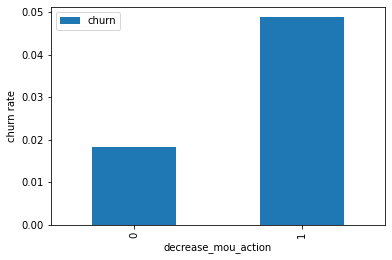

In [71]:
data.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase. 

##### Churn rate on the basis whether the customer decreased the number of recharge in action month

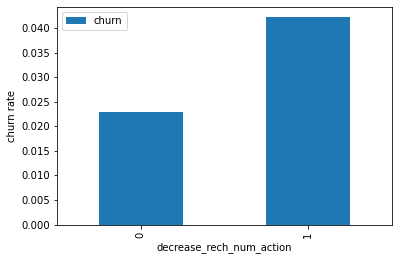

In [72]:
data.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

As expected, the churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase.

##### Churn rate on the basis whether the customer decreased her/his amount of recharge in action month

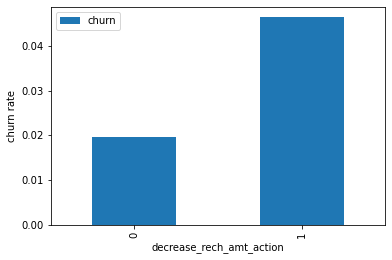

In [73]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

##### Churn rate on the basis whether the customer decreased her/his volume based cost in action month

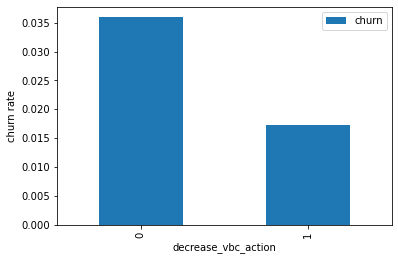

In [74]:
data.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

The churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase.

##### Analysis of the average revenue per customer (churn and not churn) in the action phase

In [75]:
# Creating churn dataframe
data_churn = data[data['churn'] == 1]
# Creating not churn dataframe
data_non_churn = data[data['churn'] == 0]

[Text(0.5, 0, 'Action phase ARPU')]

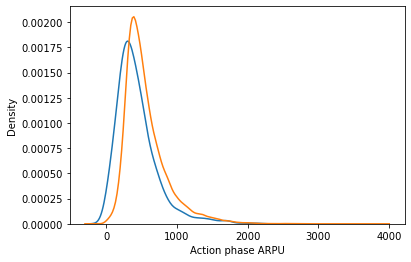

In [76]:
# Distribution plot
ax = sns.distplot(data_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

Orange shows the Not Churned Data

Blue shows the Churned Data

As you can see in the above graph, the Average revenue per user (ARPU) for the churned customers is mostly densed on the 0 to 900. The higher ARPU customers are less likely to be churned.

ARPU for the not churned customers is mostly densed on the 0 to 1000. 

##### Analysis of the minutes of usage MOU (churn and not churn) in the action phase

[Text(0.5, 0, 'Action phase MOU')]

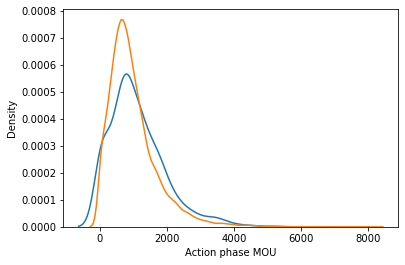

In [77]:
# Distribution plot
ax = sns.distplot(data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

Minutes of usage(MOU) of the churn customers is mostly populated on the 0 to 2500 range. Higher the MOU, lesser the churn probability.

### Bivariate analysis

##### Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase

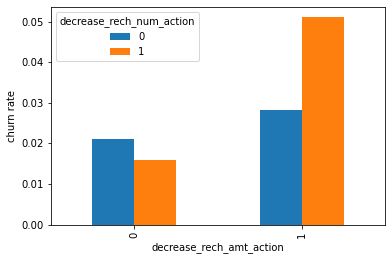

In [78]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

We can see from the above plot, that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

##### Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase

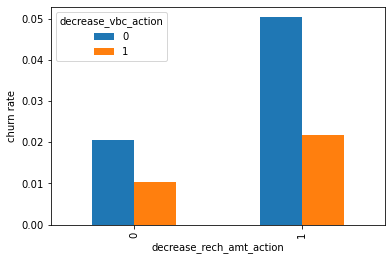

In [79]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

***Analysis***

Here, also we can see that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

##### Analysis of recharge amount and number of recharge in action month

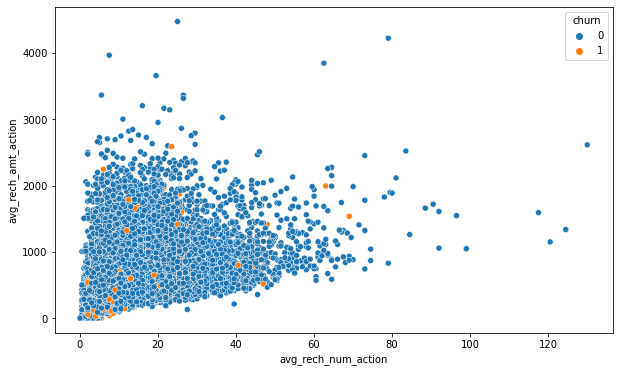

In [80]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot('avg_rech_num_action','avg_rech_amt_action', hue='churn', data=data)

***Analysis***

We can see from the above pattern that the recharge number and the recharge amount are mostly propotional. More the number of recharge, more the amount of the recharge.

#### Dropping the columns which are no longer required for the analysis

In [81]:
data = data.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','avg_rech_amt_6_7'], axis=1)

## Train-Test Split

In [82]:
# Import library
from sklearn.model_selection import train_test_split

In [83]:
# Putting feature variables into X
X = data.drop(['mobile_number','churn'], axis=1)

In [84]:
# Putting target variable to y
y = data['churn']

In [85]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### Dealing with data imbalance

We are creating samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

We need to install all the pre-requisites before installing and running the SMOTE method.

In [86]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [87]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)

In [88]:
# Fitting SMOTE to the train set using fit_resample method
X_train, y_train = sm.fit_resample(X_train, y_train)

### Feature Scaling

In [89]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [90]:
# Instantiate the Scaler
scaler = StandardScaler()

In [91]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')

In [92]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [93]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
0,0.0,0.0,0.0,0.140777,-0.522792,-0.276289,0.106540,-0.662084,-0.465777,-0.211202,-0.636415,0.317224,-0.254996,-0.001208,-0.235211,-0.300833,-0.374857,-0.412810,-0.263308,-0.311548,-0.251411,0.485770,-0.190660,-0.399182,-0.256866,-0.267401,-0.244832,-0.191587,-0.267368,-0.244432,0.129144,-0.335468,-0.418749,0.254982,-0.528622,-0.338018,-0.342394,-0.504282,0.650664,-0.143576,-0.139257,-0.119299,0.0,0.0,0.0,-0.048161,-0.731560,0.214243,-0.080803,-0.092449,-0.061631,-0.347585,-0.363159,-0.017165,-0.346191,-0.015583,-0.013735,-0.000389,-0.860412,-0.011382,-0.203981,-0.266718,-0.242771,-0.380593,-0.272733,-0.437571,-0.290528,-0.270877,-0.150060,-0.409101,-0.363983,-0.440411,-0.175106,-0.159825,0.078711,-0.164347,0.367474,-0.117454,-0.135479,-0.137327,-0.110642,0.0,0.0,0.0,-0.234904,0.121332,-0.064154,-0.475564,-0.287010,-0.420829,-0.366516,-0.089786,-0.192624,-0.151655,-0.153778,-0.126576,-0.099745,-0.121704,-0.081491,0.192736,-0.444988,0.305289,0.044172,-0.726027,-0.235478,0.054992,0.023937,0.029739,0.601511,-0.811577,-0.626096,-0.094017,0.696113,1.750783,0.510634,1.202971,-0.241652,3.236849,3.104207,-0.232664,4.023237,2.358097,2.447476,-0.224183,-0.221779,-0.216364,-0.141182,-0.136208,-0.113882,-0.361238,-0.236209,-0.265392,0.110582,1,1,1,1,1
1,0.0,0.0,0.0,-1.427243,4.428047,3.254270,-0.658491,-0.236590,-0.004450,-0.776075,2.523985,2.732154,-0.254996,-0.253231,-0.304660,-0.300833,-0.374857,-0.431026,-0.201396,0.270791,0.198344,-0.529474,1.106670,0.288951,-0.276320,-0.267401,-0.244832,-0.191587,-0.267368,-0.244432,-0.477059,0.843930,0.290569,-0.570615,-0.320253,-0.041333,-0.512504,2.294191,3.087483,-0.143576,-0.139257,-0.119299,0.0,0.0,0.0,-0.771902,1.368343,2.063999,-0.080803,-0.092449,-0.061631,-0.347585,-0.363159,-0.290355,-0.346191,-0.015583,-0.013735,-0.970285,1.670188,1.938953,-0.410762,0.193158,0.156537,-0.481723,0.744741,0.256589,-0.290528,-0.270877,-0.257696,-0.583307,0.570197,0.219470,-0.215496,-0.200464,-0.112725,-0.3551

##### Scaling the test set
Test set is directly transformed and fitting the scaler on the test set is not done.

In [94]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
5704,0.0,0.0,0.0,0.244310,-0.268832,1.005890,-0.725286,-0.690223,-0.476634,0.483540,0.307300,2.323745,-0.077655,-0.253231,-0.304660,0.215992,-0.374857,-0.431026,-0.278217,-0.282623,-0.106758,0.028192,0.006336,0.034141,-0.087435,-0.267401,-0.244832,0.037799,-0.267368,-0.244432,-0.161248,-0.195270,-0.055078,-0.610819,-0.570510,-0.420186,0.346789,0.369671,2.702104,-0.143576,-0.139257,-0.119299,0.0,0.0,0.0,-0.214836,-0.152215,1.550482,-0.080803,-0.092449,-0.061631,1.055196,0.774917,0.757960,0.315218,-0.015583,-0.013735,-0.254350,-0.209855,1.354152,-0.356975,-0.095026,0.281846,0.089162,-0.112790,0.515971,-0.290528,-0.270877,-0.194257,-0.156095,-0.166424,0.468259,-0.215496,-0.200464,-0.187265,0.113370,-0.185210,-0.166335,-0.135479,-0.137327,-0.110642,0.0,0.0,0.0,-0.077912,-0.265421,-0.233610,-0.194148,-0.204469,0.286255,-0.366516,-0.089786,-0.192624,-0.151655,0.285066,-0.126576,-0.099745,-0.121704,-0.081491,-0.156412,0.260837,1.306523,0.087587,-0.236774,0.817300,0.054992,-0.173563,0.029739,0.175643,0.368450,-0.351085,3.313695,2.175444,-0.098306,-0.262491,-0.063995,0.506232,3.236849,-0.251375,-0.232664,0.457379,2.358097,2.447476,-0.224183,-0.221779,-0.216364,1.315163,1.219546,2.526725,0.225051,0.018023,0.194794,-0.259366,0,0,1,1,0
64892,0.0,0.0,0.0,0.048359,-0.779609,-0.157969,-0.734066,-0.698072,-0.502219,-0.358555,-0.577717,-0.256061,0.022864,-0.253231,-0.304660,-0.120122,-0.374857,-0.431026,-0.278380,-0.302589,-0.174571,-0.300150,-0.204014,-0.295881,-0.261886,-0.267401,-0.244832,-0.191587,-0.267368,-0.244432,-0.379084,-0.337876,-0.306653,-0.619956,-0.570510,-0.415897,-0.231854,-0.437192,-0.040526,-0.143576,-0.139257,-0.104326,0.0,0.0,0.0,-0.616620,-0.714724,-0.306010,-0.080803,-0.092449,-0.061631,-0.327156,-0.363159,-0.290355,-0.346191,-0.015583,-0.013735,-0.775847,-0.845314,-0.422452,-0.107944,-0.347607,-0.187444,0.377903,0.199498,0.240935,-0.275866,-0.257495,-0.235146,0.172870,-0.078726,0.045944,-0.215496,-0.152024,0.151031,2.985

# Model with PCA

In [95]:
#Import PCA
from sklearn.decomposition import PCA

In [96]:
# Instantiate PCA
pca = PCA(random_state=42)

In [97]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [98]:
# Principal components
pca.components_

array([[-7.50315936e-20,  8.32667268e-17, -1.11022302e-16, ...,
        -2.59799614e-02, -2.57740516e-02,  1.40032998e-02],
       [-1.61507486e-19,  5.55111512e-17, -3.33066907e-16, ...,
        -1.16737642e-02, -9.94022864e-03, -1.42598315e-02],
       [ 1.91332162e-19,  0.00000000e+00,  1.94289029e-16, ...,
        -4.18532955e-02, -4.28357226e-02,  2.46812846e-02],
       ...,
       [ 0.00000000e+00,  2.74797799e-02, -3.98891699e-03, ...,
         1.66967135e-17, -2.22478286e-16, -2.90566182e-17],
       [ 9.99997913e-01, -8.60954478e-04, -1.83687359e-03, ...,
         4.60785923e-19,  6.94567017e-19, -1.91632734e-17],
       [-0.00000000e+00,  8.47582927e-01, -4.16821872e-01, ...,
        -1.17961196e-16,  2.77555756e-17,  2.22044605e-16]])

In [99]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.11213256 0.19426234 0.24575583 0.28953571 0.32841891 0.36623473
 0.40173361 0.43144425 0.45702167 0.48194328 0.50480575 0.52673812
 0.54724457 0.5670202  0.58530008 0.60304258 0.6190213  0.63473458
 0.64927873 0.66341423 0.67712828 0.69025011 0.7020618  0.71278516
 0.72309435 0.73290234 0.74255604 0.75209676 0.76151565 0.77010093
 0.77861315 0.7866115  0.79429496 0.80173555 0.80878909 0.81538157
 0.82193734 0.8283476  0.83472622 0.84089758 0.84687761 0.85280024
 0.85840083 0.86374029 0.86901646 0.87418749 0.87891437 0.88341796
 0.887723   0.89186057 0.89588256 0.89966074 0.90339384 0.90704071
 0.91060084 0.91411689 0.91752343 0.92076319 0.92395413 0.92705111
 0.93001239 0.93296077 0.93580029 0.93862291 0.94138851 0.9441162
 0.94678675 0.94937767 0.95188405 0.95433786 0.95665036 0.95893735
 0.96116409 0.96323063 0.96526039 0.967203   0.96912626 0.97100138
 0.97284931 0.9746657  0.97639261 0.97806622 0.97972617 0.98133794
 0.98290963 0.98446566 0.98601222 0.98753485 0.98877905 0.98998

Text(0, 0.5, 'Cumulative Variance')

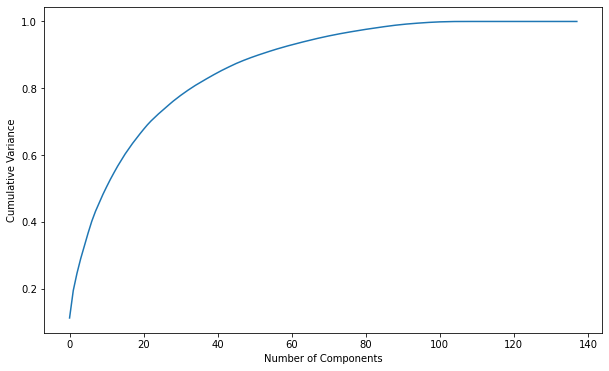

In [100]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

We can see that 60 components explain almost more than 90% variance of the data. So, we will perform PCA with 60 components.

##### Performing PCA with 60 components

In [101]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [102]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)

In [103]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

##### Applying transformation on the test set
Since, Fitting is already performed on the train set, we have to perform the transformation with the fitted data on the train set. Because, we are only doing Transform in the test set.


In [104]:
X_test_pca = pca_final.transform(X_test)

#### Emphasize Sensitivity/Recall than Accuracy

We are more focused on higher Sensitivity/Recall score than the accuracy.

We can consider few not churn customers as churn customers and provide them some incentives for retaining them.

A higher Sensitivity/Recall score is important than accuracy because we need to care more about churn cases than the not churn cases. 

The main business goal is to retain the customers, who have the possiblity to churn.

## Logistic regression with PCA

In [105]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [106]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#### Tuning hyperparameter  C
C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [107]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

##### NOTE: The GridSearchCV method takes long time to execute, but it is better than RandomizedSearchCV because GridSearchCV will give better results.

~ It took almost an hour to perform Grid Search ~

In [108]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [109]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.297925,0.046420,0.004423,0.000843,0.01,{'C': 0.01},0.900071,0.897759,0.895814,0.906425,0.887552,0.897524,0.006134,5,0.901116,0.898256,0.899387,0.895440,0.897971,0.898434,0.001861
1,0.423550,0.011281,0.003591,0.000351,0.1,{'C': 0.1},0.898177,0.896359,0.894651,0.905959,0.889403,0.896910,0.005390,6,0.901174,0.898431,0.899270,0.896725,0.899257,0.898971,0.001440
2,0.409101,0.012527,0.003802,0.000395,1,{'C': 1},0.898650,0.898693,0.895581,0.905028,0.890329,0.897656,0.004783,4,0.901988,0.898606,0.898861,0.898184,0.899199,0.899368,0.001351
3,0.478220,0.046496,0.004275,0.000663,10,{'C': 10},0.898887,0.898459,0.896744,0.904562,0.889866,0.897704,0.004719,3,0.902511,0.898956,0.898394,0.898476,0.899550,0.899577,0.001524
4,0.434693,0.016506,0.004223,0.000750,100,{'C': 100},0.899597,0.898226,0.896977,0.904330,0.890329,0.897892,0.004528,1,0.902628,0.898722,0.898569,0.898593,0.899550,0.899612,0.001550
5,0.416377,0.022670,0.003807,0.000404,1000,{'C': 1000},0.899597,0.898226,0.896977,0.904330,0.890329,0.897892,0.004528,1,0.902628,0.898839,0.898686,0.898593,0.899608,0.899671,0.001521


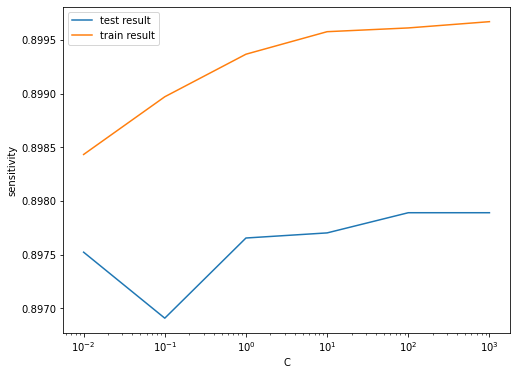

In [110]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [111]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8978916608693863 at C = 100


#### Logistic regression with optimal C

In [112]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [113]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

##### Prediction on the train set

In [114]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [115]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[17908  3517]
 [ 2154 19271]]


In [116]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [117]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8676546091015169
Sensitivity:- 0.899463243873979
Specificity:- 0.8358459743290548


##### Prediction on the test set

In [118]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [119]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4452  896]
 [  36  157]]


In [120]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [121]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8317993142032124
Sensitivity:- 0.8134715025906736
Specificity:- 0.8324607329842932


***Model summary***

- Train set
    - Accuracy = 0.86
    - Sensitivity = 0.89
    - Specificity = 0.83
- Test set
    - Accuracy = 0.83
    - Sensitivity = 0.81
    - Specificity = 0.83
    
As you can see the Accuracy, Sensitivity and Specificity are above 80%. 

The model with test set is also performing good.

## Support Vector Machine(SVM) with PCA

In [122]:
# Importing SVC
from sklearn.svm import SVC

#### Hyperparameter tuning

C:- Regularization parameter.

gamma:- Handles non linear classifications.

In [123]:
# specify range of hyperparameters

hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model with RBF kernel
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_pca, y_train)                  


Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [124]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,20.144308,4.489252,14.236182,4.295129,1,0.01,"{'C': 1, 'gamma': 0.01}",0.944903,0.941679,0.940699,0.942427,0.001796,5,0.947210,0.947247,0.947702,0.947386,0.000224
1,33.353388,4.955889,14.620496,0.597860,1,0.001,"{'C': 1, 'gamma': 0.001}",0.883366,0.884268,0.884058,0.883897,0.000385,10,0.883813,0.886757,0.885707,0.885426,0.001218
2,37.344589,5.199893,18.501254,0.474154,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.858513,0.858433,0.859133,0.858693,0.000313,12,0.858993,0.859908,0.859173,0.859358,0.000396
3,15.549373,0.464016,9.967305,4.379408,10,0.01,"{'C': 10, 'gamma': 0.01}",0.967026,0.965413,0.965063,0.965834,0.000855,3,0.975040,0.973536,0.974306,0.974294,0.000614
4,21.274249,4.692313,14.839653,4.319916,10,0.001,"{'C': 10, 'gamma': 0.001}",0.910459,0.911433,0.908073,0.909988,0.001412,7,0.913709,0.911891,0.912381,0.912660,0.000768
5,30.594922,6.395504,18.605434,4.558687,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.870414,0.869355,0.872786,0.870852,0.001434,11,0.871421,0.873875,0.870690,0.871995,0.001362
6,28.950211,6.627878,5.009634,0.051172,100,0.01,"{'C': 100, 'gamma': 0.01}",0.973397,0.976686,0.975775,0.975286,0.001387,2,0.991318,0.990444,0.990198,0.990653,0.000481
7,22.384439,0.832079,13.423563,5.588196,100,0.001,"{'C': 100, 'gamma': 0.001}",0.935662,0.935518,0.934608,0.935263,0.000467,6,0.941819,0.942066,0.941681,0.941855,0.000159
8,28.952022,5.560480,19.343846,4.790462,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.884906,0.886438,0.886718,0.886021,0.000797,9,0.886368,0.888893,0.888543,0.887935,0.001117
9,43.390535,4.305758,3.317447,0.033001,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.972277,0.977876,0.976336,0.975496,0.002362,1,0.998425,0.998495,0.998495,0.998471,0.000033


##### Plotting the accuracy with various C and gamma values

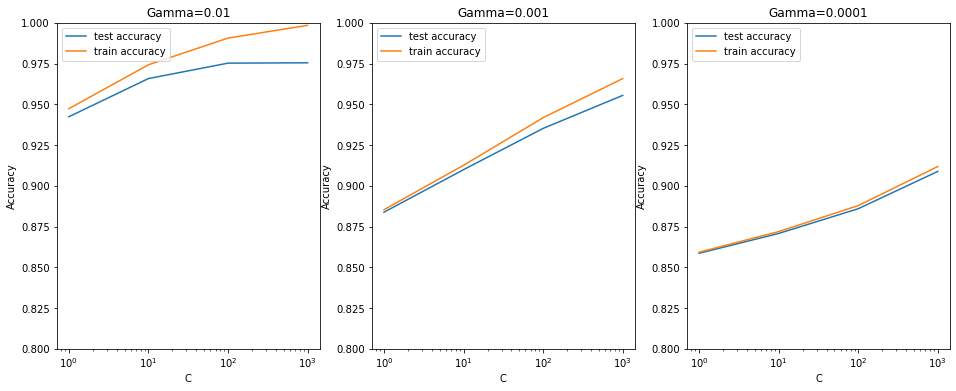

In [125]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')



In [126]:
# Printing the best score 
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9754959911159373 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


By analysing the above plots, we can conclude that higher value of gamma leads to overfitting the model. With the lowest value of gamma (0.0001) we have train and test accuracy almost same.

We have decent accuracy at C=100 and the train and test scores are comparable.

It is better to choose a simpler, more non-linear model with gamma=0.0001 than scores mentioned above (gamma=0.01, C=1000). 
* The optimal values mentioned here are calculated based on the average test accuracy and subjective paramenteres are not considered.

By increasing the cost C, we can achieve comparable average test accuracy (around 90%) with gamma=0.0001. So to achieve high accuracy, there's a tradeoff between:
- High gamma (i.e. high non-linearity) and average value of C
- Low gamma (i.e. less non-linearity) and high value of C

We argue that the model will be simpler if it has as less non-linearity as possible, so we choose gamma=0.0001 and a high C=100.

##### Build the model with optimal hyperparameters

In [127]:
# Building the model with optimal hyperparameters
svm_pca_model = SVC(C=100, gamma=0.0001, kernel="rbf")

svm_pca_model.fit(X_train_pca, y_train)

SVC(C=100, gamma=0.0001)

##### Prediction on the train set

In [128]:
# Predictions on the train set
y_train_pred = svm_pca_model.predict(X_train_pca)

In [129]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[18376  3049]
 [ 1585 19840]]


In [130]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [131]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.891855309218203
Sensitivity:- 0.9260210035005835
Specificity:- 0.8576896149358226


##### Prediction on the test set

In [132]:
# Prediction on the test set
y_test_pred = svm_pca_model.predict(X_test_pca)

In [133]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4557  791]
 [  36  157]]


In [134]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [135]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8507489622811767
Sensitivity:- 0.8134715025906736
Specificity:- 0.8520942408376964


***Model summary***

- Train set
    - Accuracy = 0.89
    - Sensitivity = 0.92
    - Specificity = 0.85
- Test set
    - Accuracy = 0.85
    - Sensitivity = 0.81
    - Specificity = 0.85

## Decision tree with PCA

In [136]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

##### NOTE: The GridSearchCV method takes long time to execute, but it is better than RandomizedSearchCV because GridSearchCV will give better results.


~ It took almost half an hour to perform Grid Search ~

##### Hyperparameter tuning

In [137]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [138]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.381292,1.923694,0.005274,0.007237,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.862310,0.855776,0.878413,0.875379,0.855309,0.865438,0.009725,5
1,0.983154,0.008263,0.003385,0.004099,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.862310,0.855776,0.878413,0.875379,0.855309,0.865438,0.009725,5
2,2.763148,2.832916,0.016037,0.013618,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.858110,0.855309,0.875846,0.869078,0.849475,0.861564,0.009567,7
3,0.961351,0.020311,0.003730,0.004638,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.858110,0.855309,0.875846,0.869078,0.849008,0.861470,0.009686,8
4,1.659289,0.014932,0.007385,0.003827,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.886114,0.894516,0.903851,0.905484,0.912485,0.900490,0.009192,1
5,1.574604,0.054321,0.002706,0.003416,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.886114,0.894516,0.903851,0.905484,0.912485,0.900490,0.009192,1
6,1.562722,0.024715,0.003227,0.003952,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.889615,0.869778,0.875613,0.891949,0.883781,0.882147,0.008369,4
7,1.650394,0.030619,0.002065,0.003141,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.889615,0.871179,0.875613,0.891949,0.884247,0.882520,0.007982,3


In [139]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.9004900816802801
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


##### Model with optimal hyperparameters

In [140]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [141]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [142]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[18913  2512]
 [ 1763 19662]]


In [143]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [144]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9002333722287048
Sensitivity:- 0.9177129521586931
Specificity:- 0.8827537922987164


##### Prediction on the test set

In [145]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [146]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4632  716]
 [  58  135]]


In [147]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [148]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8603140227395777
Sensitivity:- 0.6994818652849741
Specificity:- 0.8661181750186986


***Model summary***

- Train set
    - Accuracy = 0.90
    - Sensitivity = 0.91
    - Specificity = 0.88
- Test set
    - Accuracy = 0.86
    - Sensitivity = 0.70
    - Specificity = 0.87
    
    
By the above model performance, we observe that the Sesitivity has been decreased while evaluating the model on the test set. But the accuracy and specificity is good in the test set.

## Random forest with PCA

In [149]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

##### Hyperparameter tuning

In [150]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [151]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8445273954707045 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 300}


##### Model with optimal hyperparameters

In [152]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [153]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

##### Prediction on the train set

In [154]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

In [155]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[17304  4121]
 [ 2486 18939]]


In [156]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [157]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8458109684947491
Sensitivity:- 0.8839673278879814
Specificity:- 0.8076546091015169


##### Prediction on the test set

In [158]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [159]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4269 1079]
 [  46  147]]


In [160]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [161]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7969680563075258
Sensitivity:- 0.7616580310880829
Specificity:- 0.7982423335826477


***Model summary***

- Train set
    - Accuracy = 0.84
    - Sensitivity = 0.88
    - Specificity = 0.80
- Test set
    - Accuracy = 0.80
    - Sensitivity = 0.75
    - Specificity = 0.80
    
    
By observing above the model performance, we see that the Sensitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is good in the test set.

### Final conclusion with PCA

* Our ultimate goal was to acheive Best SENSITIVITY. 

* After evaluating several models we can see that for acheiving the goal, the SVM Models or Classic Logistic regression performs well. 

* For both the models the Sensitivity was approx 81% and Accuracy was 85%.

# Without PCA

## Logistic regression with No PCA

In [162]:
##### Importing stats model
import statsmodels.api as sm

In [163]:
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [164]:
# Fit the model
log_no_pca = log_no_pca.fit().summary()

In [165]:
# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42720
Model Family:                Binomial   Df Model:                          129
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 02 Aug 2022   Deviance:                       23572.
Time:                        14:34:01   Pearson chi2:                 3.71e+05
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -57.0741   4421.213     -0.013      0.990   -8722.493    8608.344
loc_og_t2o_mou           -4.663e-07   3.99e-05     -0.012      0.991   -7.87e-05    7.78e-05
std_og_t2o_mou           -1.108e-06   7.77e-05     -0.014      0.989      -0.000       0.000
loc_ic_t2o_mou            2.718e-07   2.06e-05      0.013      0.989   -4.02e-05    4.07e-05
arpu_6                      -0.0338      0.081     -0.418      0.676      -0.192       0.125
arpu_7                       0.0855      0.086      0.994      0.320      -0.083       0.254
arpu_8                       0.0909      0.110      0.828      0.408      -0.124       0.306
onnet_mou_6                 15.5140      3.578      4.336      0.000       8.502      22.526
onnet_mou_7                 -4.3249      1.812     -2.387      0.017      -7.877      -0.773
onnet_mou_8                  2.3520      1.829      1.286      0.199      -1.233       5.937
offnet_mou_6                15.0883      3.365      4.483      0.000       8.492      21.684
offnet_mou_7                -1.7627      1.717     -1.027      0.304      -5.127       1.602
offnet_mou_8                -0.5503      1.887     -0.292      0.771      -4.249       3.148
roam_ic_mou_6                0.1622      0.036      4.482      0.000       0.091       0.233
roam_ic_mou_7               -0.0099      0.052     -0.189      0.850      -0.112       0.092
roam_ic_mou_8                0.2041      0.044      4.663      0.000       0.118       0.290
roam_og_mou_6               -5.1508      1.132     -4.548      0.000      -7.370      -2.931
roam_og_mou_7                0.8855      0.473      1.872      0.061      -0.041       1.812
roam_og_mou_8                0.0929      0.532      0.175      0.861      -0.950       1.136
loc_og_t2t_mou_6         -3303.0831    656.770     -5.029      0.000   -4590.329   -2015.837
loc_og_t2t_mou_7         -1474.6128    680.187     -2.168      0.030   -2807.755    -141.470
loc_og_t2t_mou_8          5516.0935    628.454      8.777      0.000    4284.346    6747.841
loc_og_t2m_mou_6         -3342.7074    664.529     -5.030      0.000   -4645.160   -2040.255
loc_og_t2m_mou_7         -1392.1035    641.485     -2.170      0.030   -2649.392    -134.815
loc_og_t2m_mou_8          5887.3490    670.584      8.779      0.000    4573.029    7201.669
loc_og_t2f_mou_6          -285.2470     56.744     -5.027      0.000    -396.462    -174.032
loc_og_t2f_mou_7          -123.0161     56.710     -2.169      0.030    -234.166     -11.866
loc_og_t2f_mou_8           487.3963     55.545      8.775      0.000     378.531     596.262
loc_og_t2c_mou_6             0.0433      0.022      1.975      0.048       0.000       0.086
loc_og_t2c_mou_7             0.0099      0.021      0.462      0.644      -0.032       0.052
loc_og_t2c_mou

#### Model analysis

* By the above Regression results, we observe that few features have positive coefficients and few have negative.
* There are many features having higher p-values. Therefore, the model becomes insignificant.

#### Coarse tuning (Feature Elimination)

We'll perform Feature elimination process using Recursive Feature Elimination (RFE) and then we can perform feature elimination manually.

### Feature Selection Using RFE

In [167]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

#### RFE with 15 columns

In [168]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(logreg, step=15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [169]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['arpu_8', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
       'isd_og_mou_8', 'og_others_7', 'og_others_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'total_ic_mou_8',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'ic_others_8',
       'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'max_rech_amt_6', 'last_day_rch_amt_6',
       'last_day_rch_amt_8'

### Model-1 with RFE selected columns

In [170]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42780
Model Family:                Binomial   Df Model:                           69
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 02 Aug 2022   Deviance:                       24690.
Time:                        14:35:51   Pearson chi2:                 4.13e+05
No. Iterations:                    40   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -49.3226   4218.191     -0.012      0.991   -8316.825    8218.180
arpu_8                      -0.2505      0.100     -2.516      0.012      -0.446      -0.055
onnet_mou_7                 -0.9306      0.217     -4.291      0.000      -1.356      -0.506
onnet_mou_8                  5.5326      1.581      3.500      0.000       2.434       8.631
offnet_mou_6                -0.1296      0.036     -3.597      0.000      -0.200      -0.059
offnet_mou_7                 1.6414      0.183      8.953      0.000       1.282       2.001
offnet_mou_8                 3.0312      1.634      1.856      0.064      -0.171       6.233
roam_ic_mou_8                0.3071      0.037      8.266      0.000       0.234       0.380
roam_og_mou_8               -0.8904      0.459     -1.941      0.052      -1.790       0.009
loc_og_t2t_mou_7             0.5924      0.094      6.303      0.000       0.408       0.777
loc_og_t2t_mou_8          5914.7688    594.199      9.954      0.000    4750.160    7079.378
loc_og_t2m_mou_6            -0.2593      0.044     -5.871      0.000      -0.346      -0.173
loc_og_t2m_mou_7            -0.9160      0.085    -10.734      0.000      -1.083      -0.749
loc_og_t2m_mou_8          6312.5560    634.033      9.956      0.000    5069.874    7555.238
loc_og_t2f_mou_6             0.1454      0.034      4.232      0.000       0.078       0.213
loc_og_t2f_mou_8           522.6145     52.516      9.952      0.000     419.685     625.544
loc_og_mou_8             -9874.8829    991.908     -9.955      0.000   -1.18e+04   -7930.778
std_og_t2t_mou_6             0.2610      0.037      7.085      0.000       0.189       0.333
std_og_t2t_mou_7             1.0409      0.200      5.204      0.000       0.649       1.433
std_og_t2t_mou_8            -0.9358      0.566     -1.653      0.098      -2.046       0.174
std_og_t2m_mou_7            -0.9713      0.167     -5.810      0.000      -1.299      -0.644
std_og_t2m_mou_8             1.4205      0.522      2.720      0.007       0.397       2.444
isd_og_mou_8                -0.8911      0.182     -4.908      0.000      -1.247      -0.535
og_others_7                 -0.7721      0.723     -1.068      0.285      -2.189       0.645
og_others_8              -3600.6516   3.07e+05     -0.012      0.991   -6.06e+05    5.98e+05
total_og_mou_8              -7.6701      2.075     -3.696      0.000     -11.737      -3.603
loc_ic_t2t_mou_8          6037.6189    392.331     15.389      0.000    5268.665    6806.573
loc_ic_t2m_mou_6             0.2925      0.052      5.601      0.000       0.190       0.395
loc_ic_t2m_mou_7             0.2117      0.104      2.035      0.042       0.008       0.416
loc_ic_t2m_mou_8          8700.3277    565.370     15.389      0.000    7592.223    9808.432
loc_ic_t2f_mou

#### Checking VIFs

In [171]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [172]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,loc_og_mou_8,3.466411e+09
32,loc_ic_mou_8,2.369456e+09
12,loc_og_t2m_mou_8,1.416297e+09
9,loc_og_t2t_mou_8,1.243949e+09
28,loc_ic_t2m_mou_8,1.141445e+09
...,...,...
41,ic_others_8,1.150000e+00
23,og_others_8,1.090000e+00
22,og_others_7,1.080000e+00
39,spl_ic_mou_8,1.050000e+00


Removing column og_others_8, which is insignificatnt as it has the highest p-value 0.99

In [173]:
# Removing og_others_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('og_others_8')
print(log_cols)

['arpu_8', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_8', 'og_others_7', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'total_ic_mou_8', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'last_day_rch_amt_6', 'last_day_rch_amt_8', 'vol_2g_mb_6', 'vol_3g_mb_6', 'vol_3g_mb_7', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_7', 'sachet_2

### Model-2
Building the model after removing og_others_8 variable.

In [174]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42781
Model Family:                Binomial   Df Model:                           68
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12370.
Date:                Tue, 02 Aug 2022   Deviance:                       24740.
Time:                        14:40:43   Pearson chi2:                 4.08e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.5547
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1055      0.050      2.094      0.036       0.007       0.204
arpu_8                      -0.2434      0.100     -2.445      0.014      -0.439      -0.048
onnet_mou_7                 -0.9252      0.217     -4.269      0.000      -1.350      -0.500
onnet_mou_8                  5.8830      1.583      3.717      0.000       2.781       8.985
offnet_mou_6                -0.1317      0.036     -3.660      0.000      -0.202      -0.061
offnet_mou_7                 1.6425      0.183      8.976      0.000       1.284       2.001
offnet_mou_8                 3.4357      1.636      2.100      0.036       0.229       6.643
roam_ic_mou_8                0.3019      0.037      8.195      0.000       0.230       0.374
roam_og_mou_8               -1.0014      0.459     -2.180      0.029      -1.902      -0.101
loc_og_t2t_mou_7             0.5931      0.094      6.312      0.000       0.409       0.777
loc_og_t2t_mou_8          5935.5559    593.551     10.000      0.000    4772.217    7098.895
loc_og_t2m_mou_6            -0.2590      0.044     -5.863      0.000      -0.346      -0.172
loc_og_t2m_mou_7            -0.9123      0.085    -10.706      0.000      -1.079      -0.745
loc_og_t2m_mou_8          6334.7157    633.341     10.002      0.000    5093.389    7576.042
loc_og_t2f_mou_6             0.1467      0.034      4.269      0.000       0.079       0.214
loc_og_t2f_mou_8           524.4484     52.459      9.997      0.000     421.631     627.266
loc_og_mou_8             -9909.4235    990.826    -10.001      0.000   -1.19e+04   -7967.440
std_og_t2t_mou_6             0.2596      0.037      7.056      0.000       0.188       0.332
std_og_t2t_mou_7             1.0352      0.200      5.180      0.000       0.643       1.427
std_og_t2t_mou_8            -0.7314      0.570     -1.283      0.199      -1.848       0.386
std_og_t2m_mou_7            -0.9721      0.167     -5.825      0.000      -1.299      -0.645
std_og_t2m_mou_8             1.5931      0.528      3.018      0.003       0.559       2.628
isd_og_mou_8                -0.9794      0.195     -5.026      0.000      -1.361      -0.597
og_others_7                 -1.4704      0.764     -1.924      0.054      -2.968       0.027
total_og_mou_8              -8.5569      2.068     -4.137      0.000     -12.611      -4.503
loc_ic_t2t_mou_8          6047.7123    391.813     15.435      0.000    5279.774    6815.651
loc_ic_t2m_mou_6             0.2915      0.052      5.590      0.000       0.189       0.394
loc_ic_t2m_mou_7             0.2096      0.104      2.020      0.043       0.006       0.413
loc_ic_t2m_mou_8          8714.8741    564.623     15.435      0.000    7608.233    9821.515
loc_ic_t2f_mou_7            -0.1894      0.072     -2.643      0.008      -0.330      -0.049
loc_ic_t2f_mou

#### Checking VIF for Model-2

In [175]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,loc_og_mou_8,3.466402e+09
31,loc_ic_mou_8,2.369456e+09
12,loc_og_t2m_mou_8,1.416293e+09
9,loc_og_t2t_mou_8,1.243946e+09
27,loc_ic_t2m_mou_8,1.141445e+09
...,...,...
60,aon,1.230000e+00
40,ic_others_8,1.140000e+00
38,spl_ic_mou_8,1.050000e+00
22,og_others_7,1.050000e+00


std_ic_t2m_mou_8 has the highest p-value. Hence, deleting std_ic_t2m_mou_8.

In [176]:
# Removing offnet_mou_8 column
log_cols.remove('std_ic_t2m_mou_8')

### Model-3
Model after removing offnet_mou_8 column.

In [177]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42782
Model Family:                Binomial   Df Model:                           67
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12371.
Date:                Tue, 02 Aug 2022   Deviance:                       24742.
Time:                        15:08:52   Pearson chi2:                 4.15e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.5546
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1037      0.050      2.057      0.040       0.005       0.202
arpu_8                      -0.2446      0.100     -2.454      0.014      -0.440      -0.049
onnet_mou_7                 -0.9236      0.217     -4.260      0.000      -1.349      -0.499
onnet_mou_8                  5.8524      1.581      3.701      0.000       2.753       8.952
offnet_mou_6                -0.1330      0.036     -3.698      0.000      -0.203      -0.062
offnet_mou_7                 1.6455      0.183      8.990      0.000       1.287       2.004
offnet_mou_8                 3.4026      1.635      2.081      0.037       0.198       6.607
roam_ic_mou_8                0.3033      0.037      8.224      0.000       0.231       0.376
roam_og_mou_8               -0.9920      0.459     -2.161      0.031      -1.892      -0.092
loc_og_t2t_mou_7             0.5916      0.094      6.295      0.000       0.407       0.776
loc_og_t2t_mou_8          5951.4865    593.488     10.028      0.000    4788.272    7114.701
loc_og_t2m_mou_6            -0.2608      0.044     -5.906      0.000      -0.347      -0.174
loc_og_t2m_mou_7            -0.9116      0.085    -10.696      0.000      -1.079      -0.745
loc_og_t2m_mou_8          6351.7134    633.274     10.030      0.000    5110.519    7592.907
loc_og_t2f_mou_6             0.1470      0.034      4.272      0.000       0.080       0.214
loc_og_t2f_mou_8           525.8558     52.453     10.025      0.000     423.049     628.662
loc_og_mou_8             -9936.0159    990.721    -10.029      0.000   -1.19e+04   -7994.239
std_og_t2t_mou_6             0.2575      0.037      7.001      0.000       0.185       0.330
std_og_t2t_mou_7             1.0353      0.200      5.177      0.000       0.643       1.427
std_og_t2t_mou_8            -0.7337      0.570     -1.288      0.198      -1.851       0.383
std_og_t2m_mou_7            -0.9747      0.167     -5.838      0.000      -1.302      -0.647
std_og_t2m_mou_8             1.5934      0.528      3.019      0.003       0.559       2.628
isd_og_mou_8                -0.9955      0.197     -5.066      0.000      -1.381      -0.610
og_others_7                 -1.4678      0.765     -1.919      0.055      -2.967       0.031
total_og_mou_8              -8.5069      2.066     -4.117      0.000     -12.557      -4.457
loc_ic_t2t_mou_8          6046.5782    391.822     15.432      0.000    5278.621    6814.536
loc_ic_t2m_mou_6             0.2927      0.052      5.612      0.000       0.191       0.395
loc_ic_t2m_mou_7             0.2076      0.104      2.001      0.045       0.004       0.411
loc_ic_t2m_mou_8          8713.2423    564.637     15.432      0.000    7606.574    9819.911
loc_ic_t2f_mou_7            -0.1881      0.072     -2.626      0.009      -0.328      -0.048
loc_ic_t2f_mou

#### VIF Model-3

In [178]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,loc_og_mou_8,3.466390e+09
31,loc_ic_mou_8,2.369228e+09
12,loc_og_t2m_mou_8,1.416288e+09
9,loc_og_t2t_mou_8,1.243942e+09
27,loc_ic_t2m_mou_8,1.141333e+09
...,...,...
38,isd_ic_mou_6,1.200000e+00
39,ic_others_8,1.050000e+00
37,spl_ic_mou_8,1.050000e+00
22,og_others_7,1.050000e+00


loc_og_mou_8 has the highest VIFe. Hence, deleting loc_og_mou_8.

In [179]:
# Removing loc_og_mou_8 column
log_cols.remove('loc_og_mou_8')

### Model - 4

In [180]:
# Adding constant to X_train
X_train_sm_4 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_4 = sm.GLM(y_train, X_train_sm_4, family=sm.families.Binomial())

# Fit the model
log_no_pca_4 = log_no_pca_4.fit()

log_no_pca_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42783
Model Family:                Binomial   Df Model:                           66
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12421.
Date:                Tue, 02 Aug 2022   Deviance:                       24842.
Time:                        15:13:27   Pearson chi2:                 4.80e+05
No. Iterations:                    11   Pseudo R-squ. (CS):             0.5536
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0494      0.050      0.982      0.326      -0.049       0.148
arpu_8                      -0.2841      0.100     -2.854      0.004      -0.479      -0.089
onnet_mou_7                 -0.8052      0.216     -3.725      0.000      -1.229      -0.382
onnet_mou_8                  5.9134      1.592      3.715      0.000       2.794       9.033
offnet_mou_6                -0.1286      0.036     -3.588      0.000      -0.199      -0.058
offnet_mou_7                 1.7226      0.184      9.361      0.000       1.362       2.083
offnet_mou_8                 3.4465      1.646      2.093      0.036       0.220       6.673
roam_ic_mou_8                0.3026      0.037      8.264      0.000       0.231       0.374
roam_og_mou_8               -1.0063      0.462     -2.178      0.029      -1.912      -0.101
loc_og_t2t_mou_7             0.5278      0.094      5.629      0.000       0.344       0.712
loc_og_t2t_mou_8            -0.6518      0.287     -2.274      0.023      -1.214      -0.090
loc_og_t2m_mou_6            -0.2558      0.044     -5.758      0.000      -0.343      -0.169
loc_og_t2m_mou_7            -0.9590      0.086    -11.200      0.000      -1.127      -0.791
loc_og_t2m_mou_8             0.5610      0.277      2.022      0.043       0.017       1.105
loc_og_t2f_mou_6             0.1494      0.035      4.289      0.000       0.081       0.218
loc_og_t2f_mou_8            -0.2063      0.060     -3.420      0.001      -0.325      -0.088
std_og_t2t_mou_6             0.2581      0.037      7.055      0.000       0.186       0.330
std_og_t2t_mou_7             0.9494      0.199      4.760      0.000       0.558       1.340
std_og_t2t_mou_8            -0.6757      0.570     -1.186      0.236      -1.793       0.441
std_og_t2m_mou_7            -1.0292      0.168     -6.126      0.000      -1.359      -0.700
std_og_t2m_mou_8             1.6760      0.529      3.168      0.002       0.639       2.713
isd_og_mou_8                -1.0115      0.201     -5.024      0.000      -1.406      -0.617
og_others_7                 -1.3532      0.743     -1.820      0.069      -2.810       0.104
total_og_mou_8              -8.7236      2.082     -4.190      0.000     -12.804      -4.643
loc_ic_t2t_mou_8          6840.3103    384.097     17.809      0.000    6087.493    7593.127
loc_ic_t2m_mou_6             0.3051      0.052      5.834      0.000       0.203       0.408
loc_ic_t2m_mou_7             0.1976      0.104      1.904      0.057      -0.006       0.401
loc_ic_t2m_mou_8          9857.0515    553.505     17.808      0.000    8772.201    1.09e+04
loc_ic_t2f_mou_7            -0.2040      0.072     -2.832      0.005      -0.345      -0.063
loc_ic_t2f_mou_8          1872.7959    105.190     17.804      0.000    1666.628    2078.964
loc_ic_mou_7  

In [181]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
30,loc_ic_mou_8,2.199546e+09
26,loc_ic_t2m_mou_8,1.059593e+09
23,loc_ic_t2t_mou_8,5.102372e+08
28,loc_ic_t2f_mou_8,3.826162e+07
22,total_og_mou_8,4.309110e+03
...,...,...
37,isd_ic_mou_6,1.200000e+00
38,ic_others_8,1.050000e+00
36,spl_ic_mou_8,1.050000e+00
21,og_others_7,1.050000e+00


In [183]:
log_cols.remove('loc_ic_mou_8')

### Model - 5

In [184]:
# Adding constant to X_train
X_train_sm_5 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_5 = sm.GLM(y_train, X_train_sm_5, family=sm.families.Binomial())

# Fit the model
log_no_pca_5 = log_no_pca_5.fit()

log_no_pca_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42784
Model Family:                Binomial   Df Model:                           65
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12580.
Date:                Tue, 02 Aug 2022   Deviance:                       25160.
Time:                        15:16:17   Pearson chi2:                 6.39e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.5503
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0486      0.050     -0.965      0.335      -0.147       0.050
arpu_8                      -0.3251      0.099     -3.276      0.001      -0.520      -0.131
onnet_mou_7                 -0.6263      0.219     -2.859      0.004      -1.056      -0.197
onnet_mou_8                  5.7111      1.588      3.596      0.000       2.598       8.824
offnet_mou_6                -0.1130      0.036     -3.181      0.001      -0.183      -0.043
offnet_mou_7                 1.9254      0.187     10.307      0.000       1.559       2.291
offnet_mou_8                 3.2797      1.643      1.996      0.046       0.059       6.501
roam_ic_mou_8                0.3208      0.036      8.789      0.000       0.249       0.392
roam_og_mou_8               -0.9357      0.461     -2.029      0.042      -1.839      -0.032
loc_og_t2t_mou_7             0.4578      0.095      4.807      0.000       0.271       0.645
loc_og_t2t_mou_8            -0.3903      0.292     -1.339      0.181      -0.962       0.181
loc_og_t2m_mou_6            -0.2669      0.044     -6.033      0.000      -0.354      -0.180
loc_og_t2m_mou_7            -1.0536      0.087    -12.172      0.000      -1.223      -0.884
loc_og_t2m_mou_8             0.8036      0.284      2.827      0.005       0.247       1.361
loc_og_t2f_mou_6             0.1486      0.035      4.238      0.000       0.080       0.217
loc_og_t2f_mou_8            -0.2174      0.062     -3.497      0.000      -0.339      -0.096
std_og_t2t_mou_6             0.2819      0.036      7.738      0.000       0.210       0.353
std_og_t2t_mou_7             0.7897      0.202      3.905      0.000       0.393       1.186
std_og_t2t_mou_8            -0.1558      0.579     -0.269      0.788      -1.291       0.980
std_og_t2m_mou_7            -1.2441      0.171     -7.285      0.000      -1.579      -0.909
std_og_t2m_mou_8             2.2008      0.542      4.061      0.000       1.139       3.263
isd_og_mou_8                -1.0102      0.213     -4.749      0.000      -1.427      -0.593
og_others_7                 -1.2493      0.699     -1.786      0.074      -2.620       0.122
total_og_mou_8              -9.3365      2.069     -4.512      0.000     -13.392      -5.281
loc_ic_t2t_mou_8            -0.8095      0.098     -8.287      0.000      -1.001      -0.618
loc_ic_t2m_mou_6             0.3290      0.053      6.244      0.000       0.226       0.432
loc_ic_t2m_mou_7             0.1995      0.106      1.883      0.060      -0.008       0.407
loc_ic_t2m_mou_8            -1.3738      0.103    -13.289      0.000      -1.576      -1.171
loc_ic_t2f_mou_7            -0.2159      0.073     -2.969      0.003      -0.359      -0.073
loc_ic_t2f_mou_8            -0.7418      0.095     -7.796      0.000      -0.928      -0.555
loc_ic_mou_7  

In [185]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,total_og_mou_8,4309.11
5,offnet_mou_8,2439.82
2,onnet_mou_8,2350.40
17,std_og_t2t_mou_8,597.65
19,std_og_t2m_mou_8,498.93
...,...,...
57,aon,1.19
37,ic_others_8,1.05
21,og_others_7,1.05
35,spl_ic_mou_8,1.04


In [186]:
log_cols.remove('total_og_mou_8')

### Model - 6

In [187]:
# Adding constant to X_train
X_train_sm_6 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_6 = sm.GLM(y_train, X_train_sm_6, family=sm.families.Binomial())

# Fit the model
log_no_pca_6 = log_no_pca_6.fit()

log_no_pca_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42785
Model Family:                Binomial   Df Model:                           64
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12591.
Date:                Tue, 02 Aug 2022   Deviance:                       25182.
Time:                        15:18:46   Pearson chi2:                 6.20e+05
No. Iterations:                    11   Pseudo R-squ. (CS):             0.5500
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0464      0.050     -0.921      0.357      -0.145       0.052
arpu_8                      -0.3366      0.099     -3.391      0.001      -0.531      -0.142
onnet_mou_7                 -0.6289      0.219     -2.868      0.004      -1.059      -0.199
onnet_mou_8                 -0.9014      0.639     -1.410      0.159      -2.154       0.352
offnet_mou_6                -0.1077      0.036     -3.032      0.002      -0.177      -0.038
offnet_mou_7                 1.9139      0.187     10.241      0.000       1.548       2.280
offnet_mou_8                -3.6563      0.612     -5.972      0.000      -4.856      -2.456
roam_ic_mou_8                0.3235      0.037      8.848      0.000       0.252       0.395
roam_og_mou_8                1.0113      0.172      5.894      0.000       0.675       1.348
loc_og_t2t_mou_7             0.4544      0.095      4.768      0.000       0.268       0.641
loc_og_t2t_mou_8            -0.1540      0.288     -0.535      0.593      -0.719       0.411
loc_og_t2m_mou_6            -0.2660      0.044     -6.023      0.000      -0.352      -0.179
loc_og_t2m_mou_7            -1.0565      0.087    -12.202      0.000      -1.226      -0.887
loc_og_t2m_mou_8             1.0695      0.280      3.824      0.000       0.521       1.618
loc_og_t2f_mou_6             0.1517      0.035      4.342      0.000       0.083       0.220
loc_og_t2f_mou_8            -0.1943      0.062     -3.138      0.002      -0.316      -0.073
std_og_t2t_mou_6             0.2825      0.036      7.761      0.000       0.211       0.354
std_og_t2t_mou_7             0.7884      0.202      3.894      0.000       0.392       1.185
std_og_t2t_mou_8             0.3232      0.572      0.565      0.572      -0.799       1.445
std_og_t2m_mou_7            -1.2377      0.171     -7.241      0.000      -1.573      -0.903
std_og_t2m_mou_8             2.6974      0.534      5.052      0.000       1.651       3.744
isd_og_mou_8                -1.0249      0.212     -4.844      0.000      -1.440      -0.610
og_others_7                 -1.2812      0.705     -1.817      0.069      -2.663       0.101
loc_ic_t2t_mou_8            -0.8162      0.098     -8.362      0.000      -1.008      -0.625
loc_ic_t2m_mou_6             0.3247      0.053      6.174      0.000       0.222       0.428
loc_ic_t2m_mou_7             0.2046      0.106      1.930      0.054      -0.003       0.412
loc_ic_t2m_mou_8            -1.3840      0.103    -13.397      0.000      -1.586      -1.182
loc_ic_t2f_mou_7            -0.2194      0.073     -2.999      0.003      -0.363      -0.076
loc_ic_t2f_mou_8            -0.7398      0.095     -7.765      0.000      -0.926      -0.553
loc_ic_mou_7                 0.1953      0.112      1.744      0.081      -0.024       0.415
std_ic_t2t_mou

In [188]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,onnet_mou_8,733.05
5,offnet_mou_8,645.83
17,std_og_t2t_mou_8,592.45
19,std_og_t2m_mou_8,494.64
9,loc_og_t2t_mou_8,142.40
...,...,...
56,aon,1.19
36,ic_others_8,1.05
34,spl_ic_mou_8,1.04
21,og_others_7,1.02


In [189]:
log_cols.remove('onnet_mou_8')

### Model - 7

In [190]:
# Adding constant to X_train
X_train_sm_7 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_7 = sm.GLM(y_train, X_train_sm_7, family=sm.families.Binomial())

# Fit the model
log_no_pca_7 = log_no_pca_7.fit()

log_no_pca_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42786
Model Family:                Binomial   Df Model:                           63
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12592.
Date:                Tue, 02 Aug 2022   Deviance:                       25184.
Time:                        15:21:00   Pearson chi2:                 6.42e+05
No. Iterations:                    11   Pseudo R-squ. (CS):             0.5500
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0447      0.050     -0.888      0.374      -0.143       0.054
arpu_8                      -0.3459      0.099     -3.495      0.000      -0.540      -0.152
onnet_mou_7                 -0.6647      0.217     -3.059      0.002      -1.091      -0.239
offnet_mou_6                -0.1084      0.035     -3.054      0.002      -0.178      -0.039
offnet_mou_7                 1.8959      0.186     10.215      0.000       1.532       2.260
offnet_mou_8                -2.9069      0.294     -9.903      0.000      -3.482      -2.332
roam_ic_mou_8                0.3235      0.037      8.855      0.000       0.252       0.395
roam_og_mou_8                0.7879      0.064     12.360      0.000       0.663       0.913
loc_og_t2t_mou_7             0.4674      0.095      4.936      0.000       0.282       0.653
loc_og_t2t_mou_8            -0.5453      0.077     -7.051      0.000      -0.697      -0.394
loc_og_t2m_mou_6            -0.2664      0.044     -6.038      0.000      -0.353      -0.180
loc_og_t2m_mou_7            -1.0518      0.086    -12.196      0.000      -1.221      -0.883
loc_og_t2m_mou_8             0.7427      0.153      4.870      0.000       0.444       1.042
loc_og_t2f_mou_6             0.1521      0.035      4.354      0.000       0.084       0.221
loc_og_t2f_mou_8            -0.2224      0.059     -3.795      0.000      -0.337      -0.108
std_og_t2t_mou_6             0.2797      0.036      7.694      0.000       0.208       0.351
std_og_t2t_mou_7             0.8182      0.201      4.072      0.000       0.424       1.212
std_og_t2t_mou_8            -0.4823      0.036    -13.486      0.000      -0.552      -0.412
std_og_t2m_mou_7            -1.2217      0.170     -7.198      0.000      -1.554      -0.889
std_og_t2m_mou_8             2.0450      0.258      7.938      0.000       1.540       2.550
isd_og_mou_8                -1.0397      0.211     -4.924      0.000      -1.454      -0.626
og_others_7                 -1.2734      0.704     -1.809      0.070      -2.653       0.106
loc_ic_t2t_mou_8            -0.8187      0.098     -8.384      0.000      -1.010      -0.627
loc_ic_t2m_mou_6             0.3258      0.053      6.196      0.000       0.223       0.429
loc_ic_t2m_mou_7             0.2042      0.106      1.925      0.054      -0.004       0.412
loc_ic_t2m_mou_8            -1.3852      0.103    -13.407      0.000      -1.588      -1.183
loc_ic_t2f_mou_7            -0.2192      0.073     -2.989      0.003      -0.363      -0.075
loc_ic_t2f_mou_8            -0.7395      0.095     -7.755      0.000      -0.926      -0.553
loc_ic_mou_7                 0.1937      0.112      1.728      0.084      -0.026       0.413
std_ic_t2t_mou_8            -0.2563      0.042     -6.143      0.000      -0.338      -0.175
std_ic_t2f_mou

In [191]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,offnet_mou_8,184.05
18,std_og_t2m_mou_8,142.08
1,onnet_mou_7,135.44
15,std_og_t2t_mou_7,114.56
3,offnet_mou_7,71.40
...,...,...
55,aon,1.19
35,ic_others_8,1.05
33,spl_ic_mou_8,1.04
32,spl_ic_mou_7,1.01


In [192]:
log_cols.remove('offnet_mou_8')

### Model - 8

In [193]:
# Adding constant to X_train
X_train_sm_8 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_8 = sm.GLM(y_train, X_train_sm_8, family=sm.families.Binomial())

# Fit the model
log_no_pca_8 = log_no_pca_8.fit()

log_no_pca_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42787
Model Family:                Binomial   Df Model:                           62
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12645.
Date:                Tue, 02 Aug 2022   Deviance:                       25289.
Time:                        15:22:29   Pearson chi2:                 5.87e+05
No. Iterations:                    11   Pseudo R-squ. (CS):             0.5489
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0743      0.050     -1.480      0.139      -0.173       0.024
arpu_8                      -0.3939      0.099     -3.966      0.000      -0.588      -0.199
onnet_mou_7                 -0.0131      0.217     -0.060      0.952      -0.439       0.413
offnet_mou_6                -0.1268      0.036     -3.548      0.000      -0.197      -0.057
offnet_mou_7                 1.2075      0.170      7.103      0.000       0.874       1.541
roam_ic_mou_8                0.3163      0.036      8.671      0.000       0.245       0.388
roam_og_mou_8                0.3270      0.039      8.381      0.000       0.251       0.403
loc_og_t2t_mou_7             0.2003      0.094      2.128      0.033       0.016       0.385
loc_og_t2t_mou_8            -0.5369      0.077     -6.984      0.000      -0.688      -0.386
loc_og_t2m_mou_6            -0.2716      0.044     -6.121      0.000      -0.359      -0.185
loc_og_t2m_mou_7            -0.7965      0.082     -9.709      0.000      -0.957      -0.636
loc_og_t2m_mou_8            -0.5559      0.078     -7.093      0.000      -0.710      -0.402
loc_og_t2f_mou_6             0.1659      0.035      4.740      0.000       0.097       0.234
loc_og_t2f_mou_8            -0.3298      0.058     -5.682      0.000      -0.443      -0.216
std_og_t2t_mou_6             0.2726      0.036      7.511      0.000       0.201       0.344
std_og_t2t_mou_7             0.2168      0.200      1.083      0.279      -0.176       0.609
std_og_t2t_mou_8            -0.4773      0.036    -13.368      0.000      -0.547      -0.407
std_og_t2m_mou_7            -0.5993      0.156     -3.846      0.000      -0.905      -0.294
std_og_t2m_mou_8            -0.4752      0.039    -12.271      0.000      -0.551      -0.399
isd_og_mou_8                -1.1158      0.213     -5.244      0.000      -1.533      -0.699
og_others_7                 -1.2308      0.690     -1.783      0.075      -2.584       0.122
loc_ic_t2t_mou_8            -0.7645      0.097     -7.887      0.000      -0.955      -0.575
loc_ic_t2m_mou_6             0.3306      0.053      6.242      0.000       0.227       0.434
loc_ic_t2m_mou_7             0.2051      0.106      1.935      0.053      -0.003       0.413
loc_ic_t2m_mou_8            -1.3779      0.104    -13.276      0.000      -1.581      -1.174
loc_ic_t2f_mou_7            -0.2097      0.070     -2.976      0.003      -0.348      -0.072
loc_ic_t2f_mou_8            -0.7178      0.093     -7.684      0.000      -0.901      -0.535
loc_ic_mou_7                 0.1779      0.112      1.591      0.112      -0.041       0.397
std_ic_t2t_mou_8            -0.2514      0.042     -6.029      0.000      -0.333      -0.170
std_ic_t2f_mou_7             0.2066      0.032      6.365      0.000       0.143       0.270
std_ic_t2f_mou

In [194]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,onnet_mou_7,118.08
14,std_og_t2t_mou_7,100.01
3,offnet_mou_7,55.89
16,std_og_t2m_mou_7,45.47
6,loc_og_t2t_mou_7,21.02
...,...,...
18,isd_og_mou_8,1.16
34,ic_others_8,1.05
32,spl_ic_mou_8,1.04
19,og_others_7,1.01


In [197]:
log_cols.remove('onnet_mou_7')

### Model - 9

In [198]:
# Adding constant to X_train
X_train_sm_9 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_9 = sm.GLM(y_train, X_train_sm_9, family=sm.families.Binomial())

# Fit the model
log_no_pca_9 = log_no_pca_9.fit()

log_no_pca_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42788
Model Family:                Binomial   Df Model:                           61
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12645.
Date:                Tue, 02 Aug 2022   Deviance:                       25289.
Time:                        15:24:43   Pearson chi2:                 5.86e+05
No. Iterations:                    11   Pseudo R-squ. (CS):             0.5489
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0742      0.050     -1.479      0.139      -0.173       0.024
arpu_8                      -0.3932      0.099     -3.987      0.000      -0.586      -0.200
offnet_mou_6                -0.1266      0.036     -3.555      0.000      -0.196      -0.057
offnet_mou_7                 1.2055      0.167      7.238      0.000       0.879       1.532
roam_ic_mou_8                0.3163      0.036      8.674      0.000       0.245       0.388
roam_og_mou_8                0.3264      0.038      8.631      0.000       0.252       0.400
loc_og_t2t_mou_7             0.1953      0.046      4.283      0.000       0.106       0.285
loc_og_t2t_mou_8            -0.5371      0.077     -6.993      0.000      -0.688      -0.387
loc_og_t2m_mou_6            -0.2715      0.044     -6.121      0.000      -0.358      -0.185
loc_og_t2m_mou_7            -0.7953      0.080     -9.963      0.000      -0.952      -0.639
loc_og_t2m_mou_8            -0.5562      0.078     -7.106      0.000      -0.710      -0.403
loc_og_t2f_mou_6             0.1659      0.035      4.745      0.000       0.097       0.234
loc_og_t2f_mou_8            -0.3297      0.058     -5.682      0.000      -0.443      -0.216
std_og_t2t_mou_6             0.2726      0.036      7.511      0.000       0.201       0.344
std_og_t2t_mou_7             0.2050      0.037      5.535      0.000       0.132       0.278
std_og_t2t_mou_8            -0.4776      0.035    -13.496      0.000      -0.547      -0.408
std_og_t2m_mou_7            -0.5969      0.151     -3.957      0.000      -0.893      -0.301
std_og_t2m_mou_8            -0.4755      0.038    -12.386      0.000      -0.551      -0.400
isd_og_mou_8                -1.1153      0.213     -5.247      0.000      -1.532      -0.699
og_others_7                 -1.2297      0.690     -1.783      0.075      -2.582       0.122
loc_ic_t2t_mou_8            -0.7646      0.097     -7.890      0.000      -0.955      -0.575
loc_ic_t2m_mou_6             0.3305      0.053      6.242      0.000       0.227       0.434
loc_ic_t2m_mou_7             0.2051      0.106      1.935      0.053      -0.003       0.413
loc_ic_t2m_mou_8            -1.3779      0.104    -13.277      0.000      -1.581      -1.175
loc_ic_t2f_mou_7            -0.2098      0.070     -2.978      0.003      -0.348      -0.072
loc_ic_t2f_mou_8            -0.7176      0.093     -7.685      0.000      -0.901      -0.535
loc_ic_mou_7                 0.1781      0.112      1.594      0.111      -0.041       0.397
std_ic_t2t_mou_8            -0.2515      0.042     -6.035      0.000      -0.333      -0.170
std_ic_t2f_mou_7             0.2067      0.032      6.372      0.000       0.143       0.270
std_ic_t2f_mou_8            -0.7742      0.090     -8.579      0.000      -0.951      -0.597
total_ic_mou_8

In [199]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,offnet_mou_7,55.73
15,std_og_t2m_mou_7,44.88
0,arpu_8,19.28
37,total_rech_amt_8,16.37
8,loc_og_t2m_mou_7,11.89
...,...,...
17,isd_og_mou_8,1.16
33,ic_others_8,1.05
31,spl_ic_mou_8,1.04
18,og_others_7,1.01


In [200]:
log_cols.remove('offnet_mou_7')

### Model - 10

In [201]:
# Adding constant to X_train
X_train_sm_10 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_10 = sm.GLM(y_train, X_train_sm_10, family=sm.families.Binomial())

# Fit the model
log_no_pca_10 = log_no_pca_10.fit()

log_no_pca_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42789
Model Family:                Binomial   Df Model:                           60
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12674.
Date:                Tue, 02 Aug 2022   Deviance:                       25348.
Time:                        15:26:03   Pearson chi2:                 5.17e+05
No. Iterations:                    11   Pseudo R-squ. (CS):             0.5483
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0605      0.050     -1.213      0.225      -0.158       0.037
arpu_8                      -0.5101      0.097     -5.275      0.000      -0.700      -0.321
offnet_mou_6                -0.0922      0.036     -2.590      0.010      -0.162      -0.022
roam_ic_mou_8                0.3412      0.037      9.103      0.000       0.268       0.415
roam_og_mou_8                0.4247      0.036     11.708      0.000       0.354       0.496
loc_og_t2t_mou_7             0.1674      0.045      3.683      0.000       0.078       0.257
loc_og_t2t_mou_8            -0.5126      0.076     -6.727      0.000      -0.662      -0.363
loc_og_t2m_mou_6            -0.2787      0.044     -6.302      0.000      -0.365      -0.192
loc_og_t2m_mou_7            -0.3947      0.057     -6.954      0.000      -0.506      -0.283
loc_og_t2m_mou_8            -0.5292      0.078     -6.753      0.000      -0.683      -0.376
loc_og_t2f_mou_6             0.1918      0.034      5.620      0.000       0.125       0.259
loc_og_t2f_mou_8            -0.3218      0.058     -5.565      0.000      -0.435      -0.208
std_og_t2t_mou_6             0.2633      0.036      7.265      0.000       0.192       0.334
std_og_t2t_mou_7             0.1311      0.036      3.679      0.000       0.061       0.201
std_og_t2t_mou_8            -0.4405      0.035    -12.592      0.000      -0.509      -0.372
std_og_t2m_mou_7             0.4495      0.039     11.556      0.000       0.373       0.526
std_og_t2m_mou_8            -0.4326      0.038    -11.426      0.000      -0.507      -0.358
isd_og_mou_8                -1.1245      0.216     -5.200      0.000      -1.548      -0.701
og_others_7                 -1.0843      0.648     -1.674      0.094      -2.354       0.185
loc_ic_t2t_mou_8            -0.7570      0.097     -7.796      0.000      -0.947      -0.567
loc_ic_t2m_mou_6             0.3348      0.053      6.319      0.000       0.231       0.439
loc_ic_t2m_mou_7             0.2237      0.108      2.062      0.039       0.011       0.436
loc_ic_t2m_mou_8            -1.3636      0.104    -13.149      0.000      -1.567      -1.160
loc_ic_t2f_mou_7            -0.1981      0.071     -2.776      0.006      -0.338      -0.058
loc_ic_t2f_mou_8            -0.7038      0.093     -7.535      0.000      -0.887      -0.521
loc_ic_mou_7                 0.1126      0.115      0.975      0.330      -0.114       0.339
std_ic_t2t_mou_8            -0.2500      0.042     -6.009      0.000      -0.332      -0.168
std_ic_t2f_mou_7             0.1969      0.032      6.104      0.000       0.134       0.260
std_ic_t2f_mou_8            -0.6971      0.087     -8.046      0.000      -0.867      -0.527
total_ic_mou_8              -0.3328      0.076     -4.373      0.000      -0.482      -0.184
spl_ic_mou_7  

In [202]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,18.65
36,total_rech_amt_8,16.30
28,total_ic_mou_8,11.38
24,loc_ic_mou_7,11.19
20,loc_ic_t2m_mou_7,10.87
21,loc_ic_t2m_mou_8,8.42
57,decrease_rech_amt_action,7.55
58,decrease_arpu_action,7.36
7,loc_og_t2m_mou_7,5.52
8,loc_og_t2m_mou_8,5.08


In [203]:
log_cols.remove('arpu_8')

### Model - 11

In [204]:
# Adding constant to X_train
X_train_sm_11 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_11 = sm.GLM(y_train, X_train_sm_11, family=sm.families.Binomial())

# Fit the model
log_no_pca_11 = log_no_pca_11.fit()

log_no_pca_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42790
Model Family:                Binomial   Df Model:                           59
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12688.
Date:                Tue, 02 Aug 2022   Deviance:                       25376.
Time:                        15:27:48   Pearson chi2:                 8.15e+05
No. Iterations:                    11   Pseudo R-squ. (CS):             0.5480
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0745      0.050     -1.493      0.136      -0.172       0.023
offnet_mou_6                -0.0906      0.036     -2.549      0.011      -0.160      -0.021
roam_ic_mou_8                0.3437      0.038      9.122      0.000       0.270       0.418
roam_og_mou_8                0.3874      0.035     10.919      0.000       0.318       0.457
loc_og_t2t_mou_7             0.1924      0.045      4.247      0.000       0.104       0.281
loc_og_t2t_mou_8            -0.5488      0.076     -7.198      0.000      -0.698      -0.399
loc_og_t2m_mou_6            -0.2791      0.044     -6.322      0.000      -0.366      -0.193
loc_og_t2m_mou_7            -0.3595      0.056     -6.387      0.000      -0.470      -0.249
loc_og_t2m_mou_8            -0.6095      0.077     -7.890      0.000      -0.761      -0.458
loc_og_t2f_mou_6             0.1971      0.035      5.696      0.000       0.129       0.265
loc_og_t2f_mou_8            -0.3406      0.058     -5.834      0.000      -0.455      -0.226
std_og_t2t_mou_6             0.2640      0.036      7.284      0.000       0.193       0.335
std_og_t2t_mou_7             0.1653      0.035      4.715      0.000       0.097       0.234
std_og_t2t_mou_8            -0.5029      0.033    -15.250      0.000      -0.568      -0.438
std_og_t2m_mou_7             0.4812      0.038     12.535      0.000       0.406       0.556
std_og_t2m_mou_8            -0.4922      0.036    -13.628      0.000      -0.563      -0.421
isd_og_mou_8                -1.1307      0.216     -5.228      0.000      -1.555      -0.707
og_others_7                 -1.1785      0.675     -1.746      0.081      -2.502       0.145
loc_ic_t2t_mou_8            -0.7571      0.097     -7.776      0.000      -0.948      -0.566
loc_ic_t2m_mou_6             0.3359      0.053      6.333      0.000       0.232       0.440
loc_ic_t2m_mou_7             0.2228      0.108      2.055      0.040       0.010       0.435
loc_ic_t2m_mou_8            -1.3569      0.104    -13.054      0.000      -1.561      -1.153
loc_ic_t2f_mou_7            -0.2041      0.071     -2.861      0.004      -0.344      -0.064
loc_ic_t2f_mou_8            -0.7059      0.094     -7.542      0.000      -0.889      -0.522
loc_ic_mou_7                 0.1091      0.115      0.946      0.344      -0.117       0.335
std_ic_t2t_mou_8            -0.2533      0.042     -6.071      0.000      -0.335      -0.172
std_ic_t2f_mou_7             0.2009      0.033      6.182      0.000       0.137       0.265
std_ic_t2f_mou_8            -0.7321      0.088     -8.328      0.000      -0.904      -0.560
total_ic_mou_8              -0.3483      0.076     -4.562      0.000      -0.498      -0.199
spl_ic_mou_7                -0.1951      0.035     -5.562      0.000      -0.264      -0.126
spl_ic_mou_8  

In [205]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
27,total_ic_mou_8,11.37
23,loc_ic_mou_7,11.19
19,loc_ic_t2m_mou_7,10.87
20,loc_ic_t2m_mou_8,8.42
56,decrease_rech_amt_action,7.52
57,decrease_arpu_action,7.27
35,total_rech_amt_8,6.63
6,loc_og_t2m_mou_7,5.46
17,loc_ic_t2t_mou_8,4.94
7,loc_og_t2m_mou_8,4.88


In [206]:
log_cols.remove('total_ic_mou_8')

### Model - 12

In [207]:
# Adding constant to X_train
X_train_sm_12 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_12 = sm.GLM(y_train, X_train_sm_12, family=sm.families.Binomial())

# Fit the model
log_no_pca_12 = log_no_pca_12.fit()

log_no_pca_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42791
Model Family:                Binomial   Df Model:                           58
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12699.
Date:                Tue, 02 Aug 2022   Deviance:                       25398.
Time:                        15:29:23   Pearson chi2:                 8.45e+05
No. Iterations:                    11   Pseudo R-squ. (CS):             0.5478
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0798      0.050     -1.600      0.110      -0.178       0.018
offnet_mou_6                -0.0921      0.036     -2.589      0.010      -0.162      -0.022
roam_ic_mou_8                0.3408      0.037      9.163      0.000       0.268       0.414
roam_og_mou_8                0.3892      0.035     11.031      0.000       0.320       0.458
loc_og_t2t_mou_7             0.1976      0.045      4.354      0.000       0.109       0.286
loc_og_t2t_mou_8            -0.5477      0.076     -7.186      0.000      -0.697      -0.398
loc_og_t2m_mou_6            -0.2814      0.044     -6.376      0.000      -0.368      -0.195
loc_og_t2m_mou_7            -0.3549      0.056     -6.308      0.000      -0.465      -0.245
loc_og_t2m_mou_8            -0.6102      0.077     -7.898      0.000      -0.762      -0.459
loc_og_t2f_mou_6             0.1979      0.034      5.776      0.000       0.131       0.265
loc_og_t2f_mou_8            -0.3466      0.058     -5.928      0.000      -0.461      -0.232
std_og_t2t_mou_6             0.2626      0.036      7.249      0.000       0.192       0.334
std_og_t2t_mou_7             0.1626      0.035      4.646      0.000       0.094       0.231
std_og_t2t_mou_8            -0.4961      0.033    -15.082      0.000      -0.561      -0.432
std_og_t2m_mou_7             0.4786      0.038     12.474      0.000       0.403       0.554
std_og_t2m_mou_8            -0.4999      0.036    -13.834      0.000      -0.571      -0.429
isd_og_mou_8                -1.1256      0.214     -5.252      0.000      -1.546      -0.706
og_others_7                 -1.1898      0.679     -1.752      0.080      -2.521       0.141
loc_ic_t2t_mou_8            -0.9043      0.092     -9.854      0.000      -1.084      -0.724
loc_ic_t2m_mou_6             0.3354      0.053      6.325      0.000       0.231       0.439
loc_ic_t2m_mou_7             0.2221      0.108      2.058      0.040       0.011       0.434
loc_ic_t2m_mou_8            -1.5748      0.093    -16.999      0.000      -1.756      -1.393
loc_ic_t2f_mou_7            -0.2032      0.071     -2.861      0.004      -0.342      -0.064
loc_ic_t2f_mou_8            -0.7530      0.093     -8.102      0.000      -0.935      -0.571
loc_ic_mou_7                 0.1104      0.115      0.963      0.336      -0.114       0.335
std_ic_t2t_mou_8            -0.3441      0.037     -9.337      0.000      -0.416      -0.272
std_ic_t2f_mou_7             0.2020      0.032      6.257      0.000       0.139       0.265
std_ic_t2f_mou_8            -0.7719      0.088     -8.798      0.000      -0.944      -0.600
spl_ic_mou_7                -0.1930      0.035     -5.508      0.000      -0.262      -0.124
spl_ic_mou_8                -0.4289      0.025    -16.915      0.000      -0.479      -0.379
isd_ic_mou_6  

In [208]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,loc_ic_mou_7,11.19
19,loc_ic_t2m_mou_7,10.87
55,decrease_rech_amt_action,7.52
56,decrease_arpu_action,7.27
34,total_rech_amt_8,6.61
6,loc_og_t2m_mou_7,5.45
7,loc_og_t2m_mou_8,4.88
13,std_og_t2m_mou_7,4.25
20,loc_ic_t2m_mou_8,4.22
0,offnet_mou_6,4.19


In [209]:
log_cols.remove('loc_ic_mou_7')

### Model - 13

In [210]:
# Adding constant to X_train
X_train_sm_13 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_13 = sm.GLM(y_train, X_train_sm_13, family=sm.families.Binomial())

# Fit the model
log_no_pca_13 = log_no_pca_13.fit()

log_no_pca_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42792
Model Family:                Binomial   Df Model:                           57
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12700.
Date:                Tue, 02 Aug 2022   Deviance:                       25399.
Time:                        15:31:12   Pearson chi2:                 8.44e+05
No. Iterations:                    11   Pseudo R-squ. (CS):             0.5478
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0812      0.050     -1.627      0.104      -0.179       0.017
offnet_mou_6                -0.0929      0.036     -2.614      0.009      -0.163      -0.023
roam_ic_mou_8                0.3439      0.037      9.319      0.000       0.272       0.416
roam_og_mou_8                0.3878      0.035     11.016      0.000       0.319       0.457
loc_og_t2t_mou_7             0.2065      0.045      4.640      0.000       0.119       0.294
loc_og_t2t_mou_8            -0.5585      0.076     -7.372      0.000      -0.707      -0.410
loc_og_t2m_mou_6            -0.2817      0.044     -6.381      0.000      -0.368      -0.195
loc_og_t2m_mou_7            -0.3524      0.056     -6.271      0.000      -0.463      -0.242
loc_og_t2m_mou_8            -0.6117      0.077     -7.916      0.000      -0.763      -0.460
loc_og_t2f_mou_6             0.1987      0.034      5.819      0.000       0.132       0.266
loc_og_t2f_mou_8            -0.3490      0.058     -5.971      0.000      -0.464      -0.234
std_og_t2t_mou_6             0.2619      0.036      7.229      0.000       0.191       0.333
std_og_t2t_mou_7             0.1644      0.035      4.701      0.000       0.096       0.233
std_og_t2t_mou_8            -0.4974      0.033    -15.126      0.000      -0.562      -0.433
std_og_t2m_mou_7             0.4794      0.038     12.497      0.000       0.404       0.555
std_og_t2m_mou_8            -0.5009      0.036    -13.863      0.000      -0.572      -0.430
isd_og_mou_8                -1.1272      0.215     -5.254      0.000      -1.548      -0.707
og_others_7                 -1.1950      0.681     -1.755      0.079      -2.530       0.140
loc_ic_t2t_mou_8            -0.8477      0.070    -12.137      0.000      -0.985      -0.711
loc_ic_t2m_mou_6             0.3366      0.053      6.346      0.000       0.233       0.441
loc_ic_t2m_mou_7             0.3040      0.066      4.575      0.000       0.174       0.434
loc_ic_t2m_mou_8            -1.5839      0.092    -17.179      0.000      -1.765      -1.403
loc_ic_t2f_mou_7            -0.1850      0.068     -2.702      0.007      -0.319      -0.051
loc_ic_t2f_mou_8            -0.7541      0.093     -8.111      0.000      -0.936      -0.572
std_ic_t2t_mou_8            -0.3448      0.037     -9.357      0.000      -0.417      -0.273
std_ic_t2f_mou_7             0.2030      0.032      6.320      0.000       0.140       0.266
std_ic_t2f_mou_8            -0.7725      0.088     -8.808      0.000      -0.944      -0.601
spl_ic_mou_7                -0.1928      0.035     -5.501      0.000      -0.262      -0.124
spl_ic_mou_8                -0.4289      0.025    -16.916      0.000      -0.479      -0.379
isd_ic_mou_6                -0.2129      0.047     -4.534      0.000      -0.305      -0.121
ic_others_8   

In [211]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
54,decrease_rech_amt_action,7.52
55,decrease_arpu_action,7.27
33,total_rech_amt_8,6.61
6,loc_og_t2m_mou_7,5.45
19,loc_ic_t2m_mou_7,5.26
7,loc_og_t2m_mou_8,4.87
13,std_og_t2m_mou_7,4.25
20,loc_ic_t2m_mou_8,4.22
0,offnet_mou_6,4.19
31,total_rech_amt_6,4.09


In [212]:
log_cols.remove('decrease_rech_amt_action')

In [213]:
# Adding constant to X_train
X_train_sm_13 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_13 = sm.GLM(y_train, X_train_sm_13, family=sm.families.Binomial())

# Fit the model
log_no_pca_13 = log_no_pca_13.fit()

log_no_pca_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42793
Model Family:                Binomial   Df Model:                           56
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12717.
Date:                Tue, 02 Aug 2022   Deviance:                       25433.
Time:                        15:32:15   Pearson chi2:                 9.42e+05
No. Iterations:                    11   Pseudo R-squ. (CS):             0.5474
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.1431      0.049     -2.944      0.003      -0.238      -0.048
offnet_mou_6                -0.0748      0.035     -2.117      0.034      -0.144      -0.006
roam_ic_mou_8                0.3492      0.037      9.391      0.000       0.276       0.422
roam_og_mou_8                0.3834      0.035     10.830      0.000       0.314       0.453
loc_og_t2t_mou_7             0.2082      0.044      4.682      0.000       0.121       0.295
loc_og_t2t_mou_8            -0.5562      0.076     -7.355      0.000      -0.704      -0.408
loc_og_t2m_mou_6            -0.2766      0.044     -6.261      0.000      -0.363      -0.190
loc_og_t2m_mou_7            -0.3558      0.056     -6.325      0.000      -0.466      -0.246
loc_og_t2m_mou_8            -0.6192      0.077     -8.003      0.000      -0.771      -0.468
loc_og_t2f_mou_6             0.2015      0.034      5.853      0.000       0.134       0.269
loc_og_t2f_mou_8            -0.3507      0.059     -5.991      0.000      -0.465      -0.236
std_og_t2t_mou_6             0.2737      0.036      7.584      0.000       0.203       0.344
std_og_t2t_mou_7             0.1605      0.035      4.592      0.000       0.092       0.229
std_og_t2t_mou_8            -0.5035      0.033    -15.330      0.000      -0.568      -0.439
std_og_t2m_mou_7             0.4678      0.038     12.237      0.000       0.393       0.543
std_og_t2m_mou_8            -0.5000      0.036    -13.879      0.000      -0.571      -0.429
isd_og_mou_8                -1.1351      0.216     -5.255      0.000      -1.558      -0.712
og_others_7                 -1.1442      0.660     -1.732      0.083      -2.439       0.150
loc_ic_t2t_mou_8            -0.8485      0.070    -12.109      0.000      -0.986      -0.711
loc_ic_t2m_mou_6             0.3428      0.053      6.442      0.000       0.238       0.447
loc_ic_t2m_mou_7             0.3006      0.066      4.522      0.000       0.170       0.431
loc_ic_t2m_mou_8            -1.5935      0.092    -17.259      0.000      -1.774      -1.413
loc_ic_t2f_mou_7            -0.1829      0.068     -2.694      0.007      -0.316      -0.050
loc_ic_t2f_mou_8            -0.7415      0.092     -8.025      0.000      -0.923      -0.560
std_ic_t2t_mou_8            -0.3466      0.037     -9.414      0.000      -0.419      -0.274
std_ic_t2f_mou_7             0.2045      0.032      6.335      0.000       0.141       0.268
std_ic_t2f_mou_8            -0.7807      0.088     -8.901      0.000      -0.953      -0.609
spl_ic_mou_7                -0.1900      0.035     -5.420      0.000      -0.259      -0.121
spl_ic_mou_8                -0.4308      0.025    -16.940      0.000      -0.481      -0.381
isd_ic_mou_6                -0.2098      0.047     -4.487      0.000      -0.301      -0.118
ic_others_8   

In [214]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
33,total_rech_amt_8,6.57
6,loc_og_t2m_mou_7,5.44
19,loc_ic_t2m_mou_7,5.26
7,loc_og_t2m_mou_8,4.87
54,decrease_arpu_action,4.50
13,std_og_t2m_mou_7,4.24
20,loc_ic_t2m_mou_8,4.22
0,offnet_mou_6,4.14
11,std_og_t2t_mou_7,4.03
4,loc_og_t2t_mou_8,3.97


In [215]:
log_cols.remove('total_rech_amt_8')

### Model - 14

In [216]:
# Adding constant to X_train
X_train_sm_14 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_14 = sm.GLM(y_train, X_train_sm_14, family=sm.families.Binomial())

# Fit the model
log_no_pca_14 = log_no_pca_14.fit()

log_no_pca_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42794
Model Family:                Binomial   Df Model:                           55
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12721.
Date:                Tue, 02 Aug 2022   Deviance:                       25442.
Time:                        15:33:08   Pearson chi2:                 7.16e+05
No. Iterations:                    11   Pseudo R-squ. (CS):             0.5473
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.1191      0.048     -2.487      0.013      -0.213      -0.025
offnet_mou_6                -0.0918      0.035     -2.634      0.008      -0.160      -0.023
roam_ic_mou_8                0.3482      0.037      9.358      0.000       0.275       0.421
roam_og_mou_8                0.4264      0.033     13.111      0.000       0.363       0.490
loc_og_t2t_mou_7             0.1934      0.044      4.395      0.000       0.107       0.280
loc_og_t2t_mou_8            -0.5240      0.074     -7.065      0.000      -0.669      -0.379
loc_og_t2m_mou_6            -0.2772      0.044     -6.287      0.000      -0.364      -0.191
loc_og_t2m_mou_7            -0.3638      0.056     -6.495      0.000      -0.474      -0.254
loc_og_t2m_mou_8            -0.5616      0.074     -7.550      0.000      -0.707      -0.416
loc_og_t2f_mou_6             0.2016      0.034      5.872      0.000       0.134       0.269
loc_og_t2f_mou_8            -0.3467      0.058     -5.941      0.000      -0.461      -0.232
std_og_t2t_mou_6             0.2612      0.036      7.287      0.000       0.191       0.331
std_og_t2t_mou_7             0.1474      0.035      4.255      0.000       0.080       0.215
std_og_t2t_mou_8            -0.4483      0.027    -16.509      0.000      -0.502      -0.395
std_og_t2m_mou_7             0.4596      0.038     12.058      0.000       0.385       0.534
std_og_t2m_mou_8            -0.4399      0.030    -14.718      0.000      -0.499      -0.381
isd_og_mou_8                -1.0913      0.213     -5.115      0.000      -1.509      -0.673
og_others_7                 -1.1685      0.669     -1.746      0.081      -2.480       0.143
loc_ic_t2t_mou_8            -0.8334      0.070    -11.949      0.000      -0.970      -0.697
loc_ic_t2m_mou_6             0.3377      0.053      6.359      0.000       0.234       0.442
loc_ic_t2m_mou_7             0.3023      0.066      4.558      0.000       0.172       0.432
loc_ic_t2m_mou_8            -1.5757      0.092    -17.166      0.000      -1.756      -1.396
loc_ic_t2f_mou_7            -0.1876      0.068     -2.770      0.006      -0.320      -0.055
loc_ic_t2f_mou_8            -0.7424      0.092     -8.042      0.000      -0.923      -0.561
std_ic_t2t_mou_8            -0.3395      0.037     -9.260      0.000      -0.411      -0.268
std_ic_t2f_mou_7             0.2003      0.032      6.188      0.000       0.137       0.264
std_ic_t2f_mou_8            -0.7728      0.088     -8.821      0.000      -0.945      -0.601
spl_ic_mou_7                -0.1909      0.035     -5.443      0.000      -0.260      -0.122
spl_ic_mou_8                -0.4302      0.025    -16.929      0.000      -0.480      -0.380
isd_ic_mou_6                -0.2136      0.047     -4.558      0.000      -0.306      -0.122
ic_others_8   

In [217]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,loc_og_t2m_mou_7,5.42
19,loc_ic_t2m_mou_7,5.26
53,decrease_arpu_action,4.43
7,loc_og_t2m_mou_8,4.40
20,loc_ic_t2m_mou_8,4.21
13,std_og_t2m_mou_7,4.21
0,offnet_mou_6,4.01
11,std_og_t2t_mou_7,3.98
4,loc_og_t2t_mou_8,3.87
51,decrease_mou_action,3.85


In [218]:
log_cols.remove('loc_og_t2m_mou_7')

### Model - 15

In [219]:
# Adding constant to X_train
X_train_sm_15 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_15 = sm.GLM(y_train, X_train_sm_15, family=sm.families.Binomial())

# Fit the model
log_no_pca_15 = log_no_pca_15.fit()

log_no_pca_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42795
Model Family:                Binomial   Df Model:                           54
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12742.
Date:                Tue, 02 Aug 2022   Deviance:                       25484.
Time:                        15:34:09   Pearson chi2:                 7.11e+05
No. Iterations:                    11   Pseudo R-squ. (CS):             0.5469
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.1418      0.048     -2.965      0.003      -0.236      -0.048
offnet_mou_6                -0.0913      0.035     -2.625      0.009      -0.160      -0.023
roam_ic_mou_8                0.3398      0.037      9.109      0.000       0.267       0.413
roam_og_mou_8                0.4372      0.033     13.425      0.000       0.373       0.501
loc_og_t2t_mou_7             0.1788      0.044      4.064      0.000       0.093       0.265
loc_og_t2t_mou_8            -0.5007      0.074     -6.803      0.000      -0.645      -0.356
loc_og_t2m_mou_6            -0.4187      0.041    -10.331      0.000      -0.498      -0.339
loc_og_t2m_mou_8            -0.8076      0.066    -12.231      0.000      -0.937      -0.678
loc_og_t2f_mou_6             0.1990      0.034      5.778      0.000       0.132       0.267
loc_og_t2f_mou_8            -0.3370      0.058     -5.805      0.000      -0.451      -0.223
std_og_t2t_mou_6             0.2528      0.036      7.065      0.000       0.183       0.323
std_og_t2t_mou_7             0.1538      0.034      4.466      0.000       0.086       0.221
std_og_t2t_mou_8            -0.4367      0.027    -16.169      0.000      -0.490      -0.384
std_og_t2m_mou_7             0.4558      0.038     12.045      0.000       0.382       0.530
std_og_t2m_mou_8            -0.4210      0.030    -14.235      0.000      -0.479      -0.363
isd_og_mou_8                -1.1023      0.217     -5.072      0.000      -1.528      -0.676
og_others_7                 -1.1474      0.664     -1.727      0.084      -2.450       0.155
loc_ic_t2t_mou_8            -0.8326      0.070    -11.894      0.000      -0.970      -0.695
loc_ic_t2m_mou_6             0.4141      0.052      7.896      0.000       0.311       0.517
loc_ic_t2m_mou_7             0.1251      0.061      2.050      0.040       0.006       0.245
loc_ic_t2m_mou_8            -1.4599      0.090    -16.236      0.000      -1.636      -1.284
loc_ic_t2f_mou_7            -0.1934      0.068     -2.863      0.004      -0.326      -0.061
loc_ic_t2f_mou_8            -0.7371      0.092     -7.985      0.000      -0.918      -0.556
std_ic_t2t_mou_8            -0.3341      0.037     -9.120      0.000      -0.406      -0.262
std_ic_t2f_mou_7             0.2021      0.033      6.206      0.000       0.138       0.266
std_ic_t2f_mou_8            -0.7569      0.087     -8.711      0.000      -0.927      -0.587
spl_ic_mou_7                -0.2055      0.035     -5.841      0.000      -0.274      -0.137
spl_ic_mou_8                -0.4294      0.025    -16.912      0.000      -0.479      -0.380
isd_ic_mou_6                -0.2172      0.047     -4.625      0.000      -0.309      -0.125
ic_others_8                 -1.0536      0.130     -8.105      0.000      -1.308      -0.799
total_rech_num

In [220]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,loc_ic_t2m_mou_7,4.74
52,decrease_arpu_action,4.43
12,std_og_t2m_mou_7,4.20
19,loc_ic_t2m_mou_8,4.08
0,offnet_mou_6,4.01
10,std_og_t2t_mou_7,3.97
4,loc_og_t2t_mou_8,3.85
50,decrease_mou_action,3.85
36,vol_3g_mb_6,3.77
3,loc_og_t2t_mou_7,3.70


======================================================================

Now from the model summary and the VIF list we can see that all the variables are significant and there is no multicollinearity among the variables.

Hence, we can conclude that Model-15 log_no_pca_15 will be the final model.

###  Model performance on the train set

In [221]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_15.predict(X_train_sm_15)
y_train_pred_no_pca.head()

0    2.332638e-03
1    5.897870e-02
2    1.625440e-02
3    1.591615e-04
4    1.868783e-14
dtype: float64

##### Creating a dataframe with the actual churn and the predicted probabilities

In [222]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,2.332638e-03,0
1,0,5.897870e-02,1
2,0,1.625440e-02,2
3,0,1.591615e-04,3
4,0,1.868783e-14,4


##### Finding Optimal Probablity Cutoff Point

In [223]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,2.332638e-03,0,1,0,0,0,0,0,0,0,0,0
1,0,5.897870e-02,1,1,0,0,0,0,0,0,0,0,0
2,0,1.625440e-02,2,1,0,0,0,0,0,0,0,0,0
3,0,1.591615e-04,3,1,0,0,0,0,0,0,0,0,0
4,0,1.868783e-14,4,1,0,0,0,0,0,0,0,0,0


##### Calculating the accuracy sensitivity and specificity for various probability cutoffs.

In [224]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
    

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.807818     0.987771     0.627865
0.2          0.2  0.843664     0.975636     0.711692
0.3          0.3  0.864341     0.963127     0.765554
0.4          0.4  0.875333     0.942077     0.808588
0.5          0.5  0.880840     0.915006     0.846674
0.6          0.6  0.882357     0.881307     0.883407
0.7          0.7  0.871715     0.826511     0.916919
0.8          0.8  0.833956     0.721400     0.946511
0.9          0.9  0.712625     0.452229     0.973022


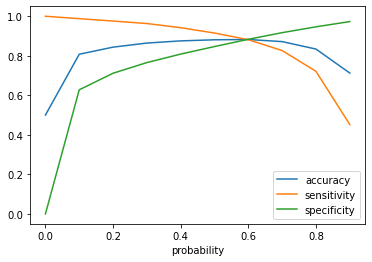

In [225]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

##### Analysis of the above curve
Accuracy - Becomes stable around 0.6

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

At point 0.6 where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.6 as the optimum probability cutoff, we are taking 0.5 for acheiving higher sensitivity, which is our main goal.

In [226]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,2.332638e-03,0,1,0,0,0,0,0,0,0,0,0,0
1,0,5.897870e-02,1,1,0,0,0,0,0,0,0,0,0,0
2,0,1.625440e-02,2,1,0,0,0,0,0,0,0,0,0,0
3,0,1.591615e-04,3,1,0,0,0,0,0,0,0,0,0,0
4,0,1.868783e-14,4,1,0,0,0,0,0,0,0,0,0,0


##### Metrics

In [227]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[18140  3285]
 [ 1821 19604]]


In [228]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [229]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.8808401400233372
Sensitivity:- 0.9150058343057176
Specificity:- 0.8466744457409568


We have got good accuracy, sensitivity and specificity on the train set prediction.

##### Plotting the ROC Curve (Trade off between sensitivity & specificity)

In [230]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

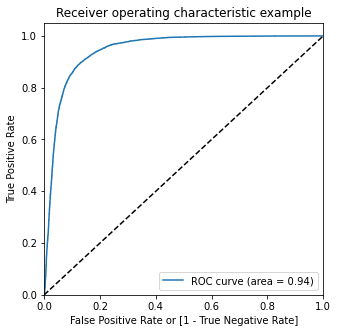

In [231]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

We can see the area of the ROC curve is closer to 1, whihc is the Gini of the model.

### Testing the model on the test set

In [232]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [233]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

In [234]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

##### Predictions on the test set with final model

In [235]:
# Predict on the test set
y_test_pred = log_no_pca_15.predict(X_test_sm)

In [236]:
y_test_pred.head()

5704     0.003643
64892    0.000128
39613    0.000399
93118    0.195767
81235    0.012863
dtype: float64

In [237]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5704,0.003643
64892,0.000128
39613,0.000399
93118,0.195767
81235,0.012863


In [238]:
# Converting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
5704,0
64892,0
39613,0
93118,0
81235,0


In [239]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [240]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [241]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [242]:
y_test_pred_final.head()

,churn,CustID,0
0,0,5704,0.003643
1,0,64892,0.000128
2,0,39613,0.000399
3,0,93118,0.195767
4,0,81235,0.012863


In [243]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [244]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex(['CustID','churn','churn_prob'], axis=1)


#using reindex instead of reindex_axis

In [245]:
y_test_pred_final.head()

,CustID,churn,churn_prob
0,5704,0,0.003643
1,64892,0,0.000128
2,39613,0,0.000399
3,93118,0,0.195767
4,81235,0,0.012863


In [246]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [247]:
y_test_pred_final.head()

,CustID,churn,churn_prob,test_predicted
0,5704,0,0.003643,0
1,64892,0,0.000128,0
2,39613,0,0.000399,0
3,93118,0,0.195767,0
4,81235,0,0.012863,0


##### Metrics

In [248]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[4510  838]
 [  40  153]]


In [249]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [250]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.8415448475004512
Sensitivity:- 0.7927461139896373
Specificity:- 0.8433059087509349


***Model summary***

- Train set
    - Accuracy = 0.88
    - Sensitivity = 0.91
    - Specificity = 0.85
- Test set
    - Accuracy = 0.84
    - Sensitivity = 0.79
    - Specificity = 0.84
    
Overall, the model is performing well in the test set

#### Final conclusion with no PCA

* We can observe from the above (no PCA) analysis, that the logistic model with no PCA(Prinicpal Component Analysis) has good sensitivity and accuracy, which are comparable to the models with PCA.

* Therefore, a more simpler model like Logistic Regression with PCA can be considered. Because it resonates the important predictor variables along with their significance.

* The model helps us to identify the variables which should be worked on for making the decision for the potential 'to be churned' customers. 

* Therefore, the model is relevant in terms of explaining to the business.

====================================================================

## Business recomendation

#### Top predictors

Below are few top variables selected in the logistic regression model.

| Variables   | Coefficients |
|---------------------|--------------|
|decrease_vbc_action|-1.7605|
|loc_ic_t2m_mou_8|-1.4599|
|og_others_7|-1.1474|
|isd_og_mou_8|-1.1023|
|ic_others_8|-1.0536|
|decrease_rech_num_action|-0.9906|
|monthly_3g_8|-0.873|
|loc_ic_t2t_mou_8|-0.8326|
|loc_og_t2m_mou_8|-0.8076|
|std_ic_t2f_mou_8|-0.7569|
|loc_ic_t2f_mou_8|-0.7371|



We can see most of the top variables have negative coefficients. That means, the variables are inversely correlated with the churn probablity.

E.g.:- 

If the local incoming calls from Operator T to other mobile (loc_ic_t2m_mou_8) is lesser in the month of August than any other month, then there is a higher chance that the customer is likely to churn.

***Recomendations***

1. Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).
2. Target the customers, whose outgoing others charge in July and incoming others on August are less.
3. Also, the customers having value based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer.
4. Cutomers, whose monthly 3G recharge in August is more, are likely to be churned. 
5. Customers having decreasing STD incoming minutes of usage for operators T to fixed lines of T for the month of August are more likely to churn.
6. Cutomers decreasing monthly 2g usage for August are most probable to churn.
7. Customers having decreasing incoming minutes of usage for operators T to fixed lines of T for August are more likely to churn.


#### Plots of important predictors for churn and non churn customers

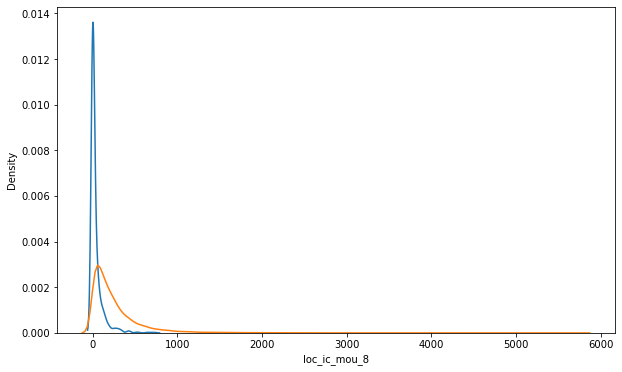

In [251]:
# Plotting loc_ic_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['loc_ic_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['loc_ic_mou_8'],label='not churn',hist=False)
plt.show()

We can see that for the churn customers the minutes of usage for the month of August is mostly populated on the lower side than the non churn customers.

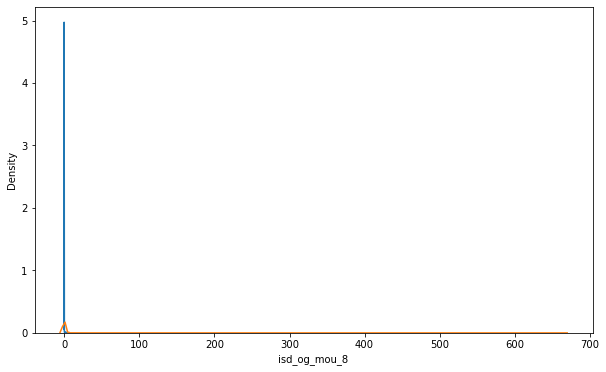

In [252]:
# Plotting isd_og_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['isd_og_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['isd_og_mou_8'],label='not churn',hist=False)
plt.show()

We can see that the ISD outgoing minutes of usage for the month of August for churn customers is densed approximately to zero. On the onther hand for the non churn customers it is little more than the churn customers.

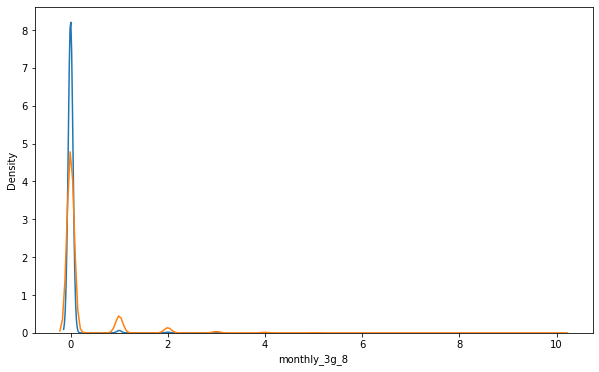

In [253]:
# Plotting monthly_3g_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['monthly_3g_8'],label='churn',hist=False)
sns.distplot(data_non_churn['monthly_3g_8'],label='not churn',hist=False)
plt.show()

The number of mothly 3g data for August for the churn customers are very much populated aroud 1, whereas of non churn customers it spreaded accross various numbers.

=============================================================================